In [1]:
k = 8

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model


import random

import sys
sys.path.append("..")

import dataset,network,dcgan_model

# Load data

In [3]:
# Preprocessing
scenario= "helix" #sinus, helix
n_instance = 1000
n_features = 3
latent_space =6#6
BATCH_SIZE = 100 #50
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 30000  #20000

X_train= x,y (1000, 2)
y_train= z (1000, 1)


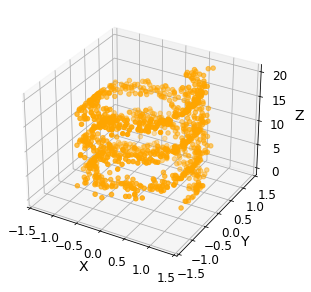

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
#export_excel(X_train, 'Dataset/X_train')
#export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')

made dataset


# DC-GAN

### Architecture

In [6]:
generator=network.build_generator(latent_space, n_features)
print('##########generator##########:')
generator.summary()
discriminator=network.build_discriminator(n_features, latent_space, BATCH_SIZE)
print('##########discriminator##########:')
discriminator.summary()
dcgan = dcgan_model.DC_GAN(k, n_features,latent_space,BATCH_SIZE)

##########generator##########:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 36)                216       
_________________________________________________________________
batch_normalization (BatchNo (None, 36)                144       
_________________________________________________________________
re_lu (ReLU)                 (None, 36)                0         
_________________________________________________________________
reshape (Reshape)            (None, 6, 6)              0         
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 6, 12)             72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 12)             48        
_________________________________________________________________
re_lu_1 (ReLU)           

### Preprocessing

In [7]:
train_dataset, scaler, X_train_scaled = dcgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

for data in train_dataset:
    print('train_dataset',data.shape)

data shape_1 (100, 3)
data shape_2 (100, 3)
data shape_3 (100, 3)
data shape_4 (100, 3)
data shape_5 (100, 3)
data shape_6 (100, 3)
data shape_7 (100, 3)
data shape_8 (100, 3)
data shape_9 (100, 3)
data shape_10 (100, 3)
Cycles:  10
X_train (1000, 2)
y_train (1000, 1)
X_train_scaled (1000, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)
train_dataset (100, 3)


Epoch 1/30000
Epoch 2/30000
Epoch 3/30000
Epoch 4/30000
Epoch 5/30000
Epoch 6/30000
Epoch 7/30000
Epoch 8/30000
Epoch 9/30000
Epoch 10/30000
Epoch 11/30000
Epoch 12/30000
Epoch 13/30000
Epoch 14/30000
Epoch 15/30000
Epoch 16/30000
Epoch 17/30000
Epoch 18/30000
Epoch 19/30000
Epoch 20/30000
Epoch 21/30000
Epoch 22/30000
Epoch 23/30000
Epoch 24/30000
Epoch 25/30000
Epoch 26/30000
Epoch 27/30000
Epoch 28/30000
Epoch 29/30000
Epoch 30/30000
Epoch 31/30000
Epoch 32/30000
Epoch 33/30000
Epoch 34/30000
Epoch 35/30000
Epoch 36/30000
Epoch 37/30000
Epoch 38/30000
Epoch 39/30000
Epoch 40/30000
Epoch 41/30000
Epoch 42/30000
Epoch 43/30000
Epoch 44/30000
Epoch 45/30000
Epoch 46/30000
Epoch 47/30000
Epoch 48/30000
Epoch 49/30000
Epoch 50/30000
Epoch 51/30000
Epoch 52/30000
Epoch 53/30000
Epoch 54/30000
Epoch 55/30000
Epoch 56/30000
Epoch 57/30000
Epoch 58/30000
Epoch 59/30000
Epoch 60/30000
Epoch 61/30000
Epoch 62/30000
Epoch 63/30000
Epoch 64/30000
Epoch 65/30000
Epoch 66/30000
Epoch 67/30000
Epoc

Epoch 521/30000
Epoch 522/30000
Epoch 523/30000
Epoch 524/30000
Epoch 525/30000
Epoch 526/30000
Epoch 527/30000
Epoch 528/30000
Epoch 529/30000
Epoch 530/30000
Epoch 531/30000
Epoch 532/30000
Epoch 533/30000
Epoch 534/30000
Epoch 535/30000
Epoch 536/30000
Epoch 537/30000
Epoch 538/30000
Epoch 539/30000
Epoch 540/30000
Epoch 541/30000
Epoch 542/30000
Epoch 543/30000
Epoch 544/30000
Epoch 545/30000
Epoch 546/30000
Epoch 547/30000
Epoch 548/30000
Epoch 549/30000
Epoch 550/30000
Epoch 551/30000
Epoch 552/30000
Epoch 553/30000
Epoch 554/30000
Epoch 555/30000
Epoch 556/30000
Epoch 557/30000
Epoch 558/30000
Epoch 559/30000
Epoch 560/30000
Epoch 561/30000
Epoch 562/30000
Epoch 563/30000
Epoch 564/30000
Epoch 565/30000
Epoch 566/30000
Epoch 567/30000
Epoch 568/30000
Epoch 569/30000
Epoch 570/30000
Epoch 571/30000
Epoch 572/30000
Epoch 573/30000
Epoch 574/30000
Epoch 575/30000
Epoch 576/30000
Epoch 577/30000
Epoch 578/30000
Epoch 579/30000
Epoch 580/30000
Epoch 581/30000
Epoch 582/30000
Epoch 58

Epoch 1036/30000
Epoch 1037/30000
Epoch 1038/30000
Epoch 1039/30000
Epoch 1040/30000
Epoch 1041/30000
Epoch 1042/30000
Epoch 1043/30000
Epoch 1044/30000
Epoch 1045/30000
Epoch 1046/30000
Epoch 1047/30000
Epoch 1048/30000
Epoch 1049/30000
Epoch 1050/30000
Epoch 1051/30000
Epoch 1052/30000
Epoch 1053/30000
Epoch 1054/30000
Epoch 1055/30000
Epoch 1056/30000
Epoch 1057/30000
Epoch 1058/30000
Epoch 1059/30000
Epoch 1060/30000
Epoch 1061/30000
Epoch 1062/30000
Epoch 1063/30000
Epoch 1064/30000
Epoch 1065/30000
Epoch 1066/30000
Epoch 1067/30000
Epoch 1068/30000
Epoch 1069/30000
Epoch 1070/30000
Epoch 1071/30000
Epoch 1072/30000
Epoch 1073/30000
Epoch 1074/30000
Epoch 1075/30000
Epoch 1076/30000
Epoch 1077/30000
Epoch 1078/30000
Epoch 1079/30000
Epoch 1080/30000
Epoch 1081/30000
Epoch 1082/30000
Epoch 1083/30000
Epoch 1084/30000
Epoch 1085/30000
Epoch 1086/30000
Epoch 1087/30000
Epoch 1088/30000
Epoch 1089/30000
Epoch 1090/30000
Epoch 1091/30000
Epoch 1092/30000
Epoch 1093/30000
Epoch 1094/300

Epoch 1520/30000
Epoch 1521/30000
Epoch 1522/30000
Epoch 1523/30000
Epoch 1524/30000
Epoch 1525/30000
Epoch 1526/30000
Epoch 1527/30000
Epoch 1528/30000
Epoch 1529/30000
Epoch 1530/30000
Epoch 1531/30000
Epoch 1532/30000
Epoch 1533/30000
Epoch 1534/30000
Epoch 1535/30000
Epoch 1536/30000
Epoch 1537/30000
Epoch 1538/30000
Epoch 1539/30000
Epoch 1540/30000
Epoch 1541/30000
Epoch 1542/30000
Epoch 1543/30000
Epoch 1544/30000
Epoch 1545/30000
Epoch 1546/30000
Epoch 1547/30000
Epoch 1548/30000
Epoch 1549/30000
Epoch 1550/30000
Epoch 1551/30000
Epoch 1552/30000
Epoch 1553/30000
Epoch 1554/30000
Epoch 1555/30000
Epoch 1556/30000
Epoch 1557/30000
Epoch 1558/30000
Epoch 1559/30000
Epoch 1560/30000
Epoch 1561/30000
Epoch 1562/30000
Epoch 1563/30000
Epoch 1564/30000
Epoch 1565/30000
Epoch 1566/30000
Epoch 1567/30000
Epoch 1568/30000
Epoch 1569/30000
Epoch 1570/30000
Epoch 1571/30000
Epoch 1572/30000
Epoch 1573/30000
Epoch 1574/30000
Epoch 1575/30000
Epoch 1576/30000
Epoch 1577/30000
Epoch 1578/300

Epoch 2006/30000
Epoch 2007/30000
Epoch 2008/30000
Epoch 2009/30000
Epoch 2010/30000
Epoch 2011/30000
Epoch 2012/30000
Epoch 2013/30000
Epoch 2014/30000
Epoch 2015/30000
Epoch 2016/30000
Epoch 2017/30000
Epoch 2018/30000
Epoch 2019/30000
Epoch 2020/30000
Epoch 2021/30000
Epoch 2022/30000
Epoch 2023/30000
Epoch 2024/30000
Epoch 2025/30000
Epoch 2026/30000
Epoch 2027/30000
Epoch 2028/30000
Epoch 2029/30000
Epoch 2030/30000
Epoch 2031/30000
Epoch 2032/30000
Epoch 2033/30000
Epoch 2034/30000
Epoch 2035/30000
Epoch 2036/30000
Epoch 2037/30000
Epoch 2038/30000
Epoch 2039/30000
Epoch 2040/30000
Epoch 2041/30000
Epoch 2042/30000
Epoch 2043/30000
Epoch 2044/30000
Epoch 2045/30000
Epoch 2046/30000
Epoch 2047/30000
Epoch 2048/30000
Epoch 2049/30000
Epoch 2050/30000
Epoch 2051/30000
Epoch 2052/30000
Epoch 2053/30000
Epoch 2054/30000
Epoch 2055/30000
Epoch 2056/30000
Epoch 2057/30000
Epoch 2058/30000
Epoch 2059/30000
Epoch 2060/30000
Epoch 2061/30000
Epoch 2062/30000
Epoch 2063/30000
Epoch 2064/300

Epoch 2490/30000
Epoch 2491/30000
Epoch 2492/30000
Epoch 2493/30000
Epoch 2494/30000
Epoch 2495/30000
Epoch 2496/30000
Epoch 2497/30000
Epoch 2498/30000
Epoch 2499/30000
Epoch 2500/30000
Epoch 2501/30000
Epoch 2502/30000
Epoch 2503/30000
Epoch 2504/30000
Epoch 2505/30000
Epoch 2506/30000
Epoch 2507/30000
Epoch 2508/30000
Epoch 2509/30000
Epoch 2510/30000
Epoch 2511/30000
Epoch 2512/30000
Epoch 2513/30000
Epoch 2514/30000
Epoch 2515/30000
Epoch 2516/30000
Epoch 2517/30000
Epoch 2518/30000
Epoch 2519/30000
Epoch 2520/30000
Epoch 2521/30000
Epoch 2522/30000
Epoch 2523/30000
Epoch 2524/30000
Epoch 2525/30000
Epoch 2526/30000
Epoch 2527/30000
Epoch 2528/30000
Epoch 2529/30000
Epoch 2530/30000
Epoch 2531/30000
Epoch 2532/30000
Epoch 2533/30000
Epoch 2534/30000
Epoch 2535/30000
Epoch 2536/30000
Epoch 2537/30000
Epoch 2538/30000
Epoch 2539/30000
Epoch 2540/30000
Epoch 2541/30000
Epoch 2542/30000
Epoch 2543/30000
Epoch 2544/30000
Epoch 2545/30000
Epoch 2546/30000
Epoch 2547/30000
Epoch 2548/300

Epoch 2974/30000
Epoch 2975/30000
Epoch 2976/30000
Epoch 2977/30000
Epoch 2978/30000
Epoch 2979/30000
Epoch 2980/30000
Epoch 2981/30000
Epoch 2982/30000
Epoch 2983/30000
Epoch 2984/30000
Epoch 2985/30000
Epoch 2986/30000
Epoch 2987/30000
Epoch 2988/30000
Epoch 2989/30000
Epoch 2990/30000
Epoch 2991/30000
Epoch 2992/30000
Epoch 2993/30000
Epoch 2994/30000
Epoch 2995/30000
Epoch 2996/30000
Epoch 2997/30000
Epoch 2998/30000
Epoch 2999/30000
Epoch 3000/30000
Epoch 3001/30000
Epoch 3002/30000
Epoch 3003/30000
Epoch 3004/30000
Epoch 3005/30000
Epoch 3006/30000
Epoch 3007/30000
Epoch 3008/30000
Epoch 3009/30000
Epoch 3010/30000
Epoch 3011/30000
Epoch 3012/30000
Epoch 3013/30000
Epoch 3014/30000
Epoch 3015/30000
Epoch 3016/30000
Epoch 3017/30000
Epoch 3018/30000
Epoch 3019/30000
Epoch 3020/30000
Epoch 3021/30000
Epoch 3022/30000
Epoch 3023/30000
Epoch 3024/30000
Epoch 3025/30000
Epoch 3026/30000
Epoch 3027/30000
Epoch 3028/30000
Epoch 3029/30000
Epoch 3030/30000
Epoch 3031/30000
Epoch 3032/300

Epoch 3460/30000
Epoch 3461/30000
Epoch 3462/30000
Epoch 3463/30000
Epoch 3464/30000
Epoch 3465/30000
Epoch 3466/30000
Epoch 3467/30000
Epoch 3468/30000
Epoch 3469/30000
Epoch 3470/30000
Epoch 3471/30000
Epoch 3472/30000
Epoch 3473/30000
Epoch 3474/30000
Epoch 3475/30000
Epoch 3476/30000
Epoch 3477/30000
Epoch 3478/30000
Epoch 3479/30000
Epoch 3480/30000
Epoch 3481/30000
Epoch 3482/30000
Epoch 3483/30000
Epoch 3484/30000
Epoch 3485/30000
Epoch 3486/30000
Epoch 3487/30000
Epoch 3488/30000
Epoch 3489/30000
Epoch 3490/30000
Epoch 3491/30000
Epoch 3492/30000
Epoch 3493/30000
Epoch 3494/30000
Epoch 3495/30000
Epoch 3496/30000
Epoch 3497/30000
Epoch 3498/30000
Epoch 3499/30000
Epoch 3500/30000
Epoch 3501/30000
Epoch 3502/30000
Epoch 3503/30000
Epoch 3504/30000
Epoch 3505/30000
Epoch 3506/30000
Epoch 3507/30000
Epoch 3508/30000
Epoch 3509/30000
Epoch 3510/30000
Epoch 3511/30000
Epoch 3512/30000
Epoch 3513/30000
Epoch 3514/30000
Epoch 3515/30000
Epoch 3516/30000
Epoch 3517/30000
Epoch 3518/300

Epoch 3942/30000
Epoch 3943/30000
Epoch 3944/30000
Epoch 3945/30000
Epoch 3946/30000
Epoch 3947/30000
Epoch 3948/30000
Epoch 3949/30000
Epoch 3950/30000
Epoch 3951/30000
Epoch 3952/30000
Epoch 3953/30000
Epoch 3954/30000
Epoch 3955/30000
Epoch 3956/30000
Epoch 3957/30000
Epoch 3958/30000
Epoch 3959/30000
Epoch 3960/30000
Epoch 3961/30000
Epoch 3962/30000
Epoch 3963/30000
Epoch 3964/30000
Epoch 3965/30000
Epoch 3966/30000
Epoch 3967/30000
Epoch 3968/30000
Epoch 3969/30000
Epoch 3970/30000
Epoch 3971/30000
Epoch 3972/30000
Epoch 3973/30000
Epoch 3974/30000
Epoch 3975/30000
Epoch 3976/30000
Epoch 3977/30000
Epoch 3978/30000
Epoch 3979/30000
Epoch 3980/30000
Epoch 3981/30000
Epoch 3982/30000
Epoch 3983/30000
Epoch 3984/30000
Epoch 3985/30000
Epoch 3986/30000
Epoch 3987/30000
Epoch 3988/30000
Epoch 3989/30000
Epoch 3990/30000
Epoch 3991/30000
Epoch 3992/30000
Epoch 3993/30000
Epoch 3994/30000
Epoch 3995/30000
Epoch 3996/30000
Epoch 3997/30000
Epoch 3998/30000
Epoch 3999/30000
Epoch 4000/300

Epoch 4427/30000
Epoch 4428/30000
Epoch 4429/30000
Epoch 4430/30000
Epoch 4431/30000
Epoch 4432/30000
Epoch 4433/30000
Epoch 4434/30000
Epoch 4435/30000
Epoch 4436/30000
Epoch 4437/30000
Epoch 4438/30000
Epoch 4439/30000
Epoch 4440/30000
Epoch 4441/30000
Epoch 4442/30000
Epoch 4443/30000
Epoch 4444/30000
Epoch 4445/30000
Epoch 4446/30000
Epoch 4447/30000
Epoch 4448/30000
Epoch 4449/30000
Epoch 4450/30000
Epoch 4451/30000
Epoch 4452/30000
Epoch 4453/30000
Epoch 4454/30000
Epoch 4455/30000
Epoch 4456/30000
Epoch 4457/30000
Epoch 4458/30000
Epoch 4459/30000
Epoch 4460/30000
Epoch 4461/30000
Epoch 4462/30000
Epoch 4463/30000
Epoch 4464/30000
Epoch 4465/30000
Epoch 4466/30000
Epoch 4467/30000
Epoch 4468/30000
Epoch 4469/30000
Epoch 4470/30000
Epoch 4471/30000
Epoch 4472/30000
Epoch 4473/30000
Epoch 4474/30000
Epoch 4475/30000
Epoch 4476/30000
Epoch 4477/30000
Epoch 4478/30000
Epoch 4479/30000
Epoch 4480/30000
Epoch 4481/30000
Epoch 4482/30000
Epoch 4483/30000
Epoch 4484/30000
Epoch 4485/300

Epoch 4913/30000
Epoch 4914/30000
Epoch 4915/30000
Epoch 4916/30000
Epoch 4917/30000
Epoch 4918/30000
Epoch 4919/30000
Epoch 4920/30000
Epoch 4921/30000
Epoch 4922/30000
Epoch 4923/30000
Epoch 4924/30000
Epoch 4925/30000
Epoch 4926/30000
Epoch 4927/30000
Epoch 4928/30000
Epoch 4929/30000
Epoch 4930/30000
Epoch 4931/30000
Epoch 4932/30000
Epoch 4933/30000
Epoch 4934/30000
Epoch 4935/30000
Epoch 4936/30000
Epoch 4937/30000
Epoch 4938/30000
Epoch 4939/30000
Epoch 4940/30000
Epoch 4941/30000
Epoch 4942/30000
Epoch 4943/30000
Epoch 4944/30000
Epoch 4945/30000
Epoch 4946/30000
Epoch 4947/30000
Epoch 4948/30000
Epoch 4949/30000
Epoch 4950/30000
Epoch 4951/30000
Epoch 4952/30000
Epoch 4953/30000
Epoch 4954/30000
Epoch 4955/30000
Epoch 4956/30000
Epoch 4957/30000
Epoch 4958/30000
Epoch 4959/30000
Epoch 4960/30000
Epoch 4961/30000
Epoch 4962/30000
Epoch 4963/30000
Epoch 4964/30000
Epoch 4965/30000
Epoch 4966/30000
Epoch 4967/30000
Epoch 4968/30000
Epoch 4969/30000
Epoch 4970/30000
Epoch 4971/300

Epoch 5397/30000
Epoch 5398/30000
Epoch 5399/30000
Epoch 5400/30000
Epoch 5401/30000
Epoch 5402/30000
Epoch 5403/30000
Epoch 5404/30000
Epoch 5405/30000
Epoch 5406/30000
Epoch 5407/30000
Epoch 5408/30000
Epoch 5409/30000
Epoch 5410/30000
Epoch 5411/30000
Epoch 5412/30000
Epoch 5413/30000
Epoch 5414/30000
Epoch 5415/30000
Epoch 5416/30000
Epoch 5417/30000
Epoch 5418/30000
Epoch 5419/30000
Epoch 5420/30000
Epoch 5421/30000
Epoch 5422/30000
Epoch 5423/30000
Epoch 5424/30000
Epoch 5425/30000
Epoch 5426/30000
Epoch 5427/30000
Epoch 5428/30000
Epoch 5429/30000
Epoch 5430/30000
Epoch 5431/30000
Epoch 5432/30000
Epoch 5433/30000
Epoch 5434/30000
Epoch 5435/30000
Epoch 5436/30000
Epoch 5437/30000
Epoch 5438/30000
Epoch 5439/30000
Epoch 5440/30000
Epoch 5441/30000
Epoch 5442/30000
Epoch 5443/30000
Epoch 5444/30000
Epoch 5445/30000
Epoch 5446/30000
Epoch 5447/30000
Epoch 5448/30000
Epoch 5449/30000
Epoch 5450/30000
Epoch 5451/30000
Epoch 5452/30000
Epoch 5453/30000
Epoch 5454/30000
Epoch 5455/300

Epoch 5880/30000
Epoch 5881/30000
Epoch 5882/30000
Epoch 5883/30000
Epoch 5884/30000
Epoch 5885/30000
Epoch 5886/30000
Epoch 5887/30000
Epoch 5888/30000
Epoch 5889/30000
Epoch 5890/30000
Epoch 5891/30000
Epoch 5892/30000
Epoch 5893/30000
Epoch 5894/30000
Epoch 5895/30000
Epoch 5896/30000
Epoch 5897/30000
Epoch 5898/30000
Epoch 5899/30000
Epoch 5900/30000
Epoch 5901/30000
Epoch 5902/30000
Epoch 5903/30000
Epoch 5904/30000
Epoch 5905/30000
Epoch 5906/30000
Epoch 5907/30000
Epoch 5908/30000
Epoch 5909/30000
Epoch 5910/30000
Epoch 5911/30000
Epoch 5912/30000
Epoch 5913/30000
Epoch 5914/30000
Epoch 5915/30000
Epoch 5916/30000
Epoch 5917/30000
Epoch 5918/30000
Epoch 5919/30000
Epoch 5920/30000
Epoch 5921/30000
Epoch 5922/30000
Epoch 5923/30000
Epoch 5924/30000
Epoch 5925/30000
Epoch 5926/30000
Epoch 5927/30000
Epoch 5928/30000
Epoch 5929/30000
Epoch 5930/30000
Epoch 5931/30000
Epoch 5932/30000
Epoch 5933/30000
Epoch 5934/30000
Epoch 5935/30000
Epoch 5936/30000
Epoch 5937/30000
Epoch 5938/300

Epoch 6365/30000
Epoch 6366/30000
Epoch 6367/30000
Epoch 6368/30000
Epoch 6369/30000
Epoch 6370/30000
Epoch 6371/30000
Epoch 6372/30000
Epoch 6373/30000
Epoch 6374/30000
Epoch 6375/30000
Epoch 6376/30000
Epoch 6377/30000
Epoch 6378/30000
Epoch 6379/30000
Epoch 6380/30000
Epoch 6381/30000
Epoch 6382/30000
Epoch 6383/30000
Epoch 6384/30000
Epoch 6385/30000
Epoch 6386/30000
Epoch 6387/30000
Epoch 6388/30000
Epoch 6389/30000
Epoch 6390/30000
Epoch 6391/30000
Epoch 6392/30000
Epoch 6393/30000
Epoch 6394/30000
Epoch 6395/30000
Epoch 6396/30000
Epoch 6397/30000
Epoch 6398/30000
Epoch 6399/30000
Epoch 6400/30000
Epoch 6401/30000
Epoch 6402/30000
Epoch 6403/30000
Epoch 6404/30000
Epoch 6405/30000
Epoch 6406/30000
Epoch 6407/30000
Epoch 6408/30000
Epoch 6409/30000
Epoch 6410/30000
Epoch 6411/30000
Epoch 6412/30000
Epoch 6413/30000
Epoch 6414/30000
Epoch 6415/30000
Epoch 6416/30000
Epoch 6417/30000
Epoch 6418/30000
Epoch 6419/30000
Epoch 6420/30000
Epoch 6421/30000
Epoch 6422/30000
Epoch 6423/300

Epoch 6848/30000
Epoch 6849/30000
Epoch 6850/30000
Epoch 6851/30000
Epoch 6852/30000
Epoch 6853/30000
Epoch 6854/30000
Epoch 6855/30000
Epoch 6856/30000
Epoch 6857/30000
Epoch 6858/30000
Epoch 6859/30000
Epoch 6860/30000
Epoch 6861/30000
Epoch 6862/30000
Epoch 6863/30000
Epoch 6864/30000
Epoch 6865/30000
Epoch 6866/30000
Epoch 6867/30000
Epoch 6868/30000
Epoch 6869/30000
Epoch 6870/30000
Epoch 6871/30000
Epoch 6872/30000
Epoch 6873/30000
Epoch 6874/30000
Epoch 6875/30000
Epoch 6876/30000
Epoch 6877/30000
Epoch 6878/30000
Epoch 6879/30000
Epoch 6880/30000
Epoch 6881/30000
Epoch 6882/30000
Epoch 6883/30000
Epoch 6884/30000
Epoch 6885/30000
Epoch 6886/30000
Epoch 6887/30000
Epoch 6888/30000
Epoch 6889/30000
Epoch 6890/30000
Epoch 6891/30000
Epoch 6892/30000
Epoch 6893/30000
Epoch 6894/30000
Epoch 6895/30000
Epoch 6896/30000
Epoch 6897/30000
Epoch 6898/30000
Epoch 6899/30000
Epoch 6900/30000
Epoch 6901/30000
Epoch 6902/30000
Epoch 6903/30000
Epoch 6904/30000
Epoch 6905/30000
Epoch 6906/300

Epoch 7330/30000
Epoch 7331/30000
Epoch 7332/30000
Epoch 7333/30000
Epoch 7334/30000
Epoch 7335/30000
Epoch 7336/30000
Epoch 7337/30000
Epoch 7338/30000
Epoch 7339/30000
Epoch 7340/30000
Epoch 7341/30000
Epoch 7342/30000
Epoch 7343/30000
Epoch 7344/30000
Epoch 7345/30000
Epoch 7346/30000
Epoch 7347/30000
Epoch 7348/30000
Epoch 7349/30000
Epoch 7350/30000
Epoch 7351/30000
Epoch 7352/30000
Epoch 7353/30000
Epoch 7354/30000
Epoch 7355/30000
Epoch 7356/30000
Epoch 7357/30000
Epoch 7358/30000
Epoch 7359/30000
Epoch 7360/30000
Epoch 7361/30000
Epoch 7362/30000
Epoch 7363/30000
Epoch 7364/30000
Epoch 7365/30000
Epoch 7366/30000
Epoch 7367/30000
Epoch 7368/30000
Epoch 7369/30000
Epoch 7370/30000
Epoch 7371/30000
Epoch 7372/30000
Epoch 7373/30000
Epoch 7374/30000
Epoch 7375/30000
Epoch 7376/30000
Epoch 7377/30000
Epoch 7378/30000
Epoch 7379/30000
Epoch 7380/30000
Epoch 7381/30000
Epoch 7382/30000
Epoch 7383/30000
Epoch 7384/30000
Epoch 7385/30000
Epoch 7386/30000
Epoch 7387/30000
Epoch 7388/300

Epoch 7815/30000
Epoch 7816/30000
Epoch 7817/30000
Epoch 7818/30000
Epoch 7819/30000
Epoch 7820/30000
Epoch 7821/30000
Epoch 7822/30000
Epoch 7823/30000
Epoch 7824/30000
Epoch 7825/30000
Epoch 7826/30000
Epoch 7827/30000
Epoch 7828/30000
Epoch 7829/30000
Epoch 7830/30000
Epoch 7831/30000
Epoch 7832/30000
Epoch 7833/30000
Epoch 7834/30000
Epoch 7835/30000
Epoch 7836/30000
Epoch 7837/30000
Epoch 7838/30000
Epoch 7839/30000
Epoch 7840/30000
Epoch 7841/30000
Epoch 7842/30000
Epoch 7843/30000
Epoch 7844/30000
Epoch 7845/30000
Epoch 7846/30000
Epoch 7847/30000
Epoch 7848/30000
Epoch 7849/30000
Epoch 7850/30000
Epoch 7851/30000
Epoch 7852/30000
Epoch 7853/30000
Epoch 7854/30000
Epoch 7855/30000
Epoch 7856/30000
Epoch 7857/30000
Epoch 7858/30000
Epoch 7859/30000
Epoch 7860/30000
Epoch 7861/30000
Epoch 7862/30000
Epoch 7863/30000
Epoch 7864/30000
Epoch 7865/30000
Epoch 7866/30000
Epoch 7867/30000
Epoch 7868/30000
Epoch 7869/30000
Epoch 7870/30000
Epoch 7871/30000
Epoch 7872/30000
Epoch 7873/300

Epoch 8297/30000
Epoch 8298/30000
Epoch 8299/30000
Epoch 8300/30000
Epoch 8301/30000
Epoch 8302/30000
Epoch 8303/30000
Epoch 8304/30000
Epoch 8305/30000
Epoch 8306/30000
Epoch 8307/30000
Epoch 8308/30000
Epoch 8309/30000
Epoch 8310/30000
Epoch 8311/30000
Epoch 8312/30000
Epoch 8313/30000
Epoch 8314/30000
Epoch 8315/30000
Epoch 8316/30000
Epoch 8317/30000
Epoch 8318/30000
Epoch 8319/30000
Epoch 8320/30000
Epoch 8321/30000
Epoch 8322/30000
Epoch 8323/30000
Epoch 8324/30000
Epoch 8325/30000
Epoch 8326/30000
Epoch 8327/30000
Epoch 8328/30000
Epoch 8329/30000
Epoch 8330/30000
Epoch 8331/30000
Epoch 8332/30000
Epoch 8333/30000
Epoch 8334/30000
Epoch 8335/30000
Epoch 8336/30000
Epoch 8337/30000
Epoch 8338/30000
Epoch 8339/30000
Epoch 8340/30000
Epoch 8341/30000
Epoch 8342/30000
Epoch 8343/30000
Epoch 8344/30000
Epoch 8345/30000
Epoch 8346/30000
Epoch 8347/30000
Epoch 8348/30000
Epoch 8349/30000
Epoch 8350/30000
Epoch 8351/30000
Epoch 8352/30000
Epoch 8353/30000
Epoch 8354/30000
Epoch 8355/300

Epoch 8779/30000
Epoch 8780/30000
Epoch 8781/30000
Epoch 8782/30000
Epoch 8783/30000
Epoch 8784/30000
Epoch 8785/30000
Epoch 8786/30000
Epoch 8787/30000
Epoch 8788/30000
Epoch 8789/30000
Epoch 8790/30000
Epoch 8791/30000
Epoch 8792/30000
Epoch 8793/30000
Epoch 8794/30000
Epoch 8795/30000
Epoch 8796/30000
Epoch 8797/30000
Epoch 8798/30000
Epoch 8799/30000
Epoch 8800/30000
Epoch 8801/30000
Epoch 8802/30000
Epoch 8803/30000
Epoch 8804/30000
Epoch 8805/30000
Epoch 8806/30000
Epoch 8807/30000
Epoch 8808/30000
Epoch 8809/30000
Epoch 8810/30000
Epoch 8811/30000
Epoch 8812/30000
Epoch 8813/30000
Epoch 8814/30000
Epoch 8815/30000
Epoch 8816/30000
Epoch 8817/30000
Epoch 8818/30000
Epoch 8819/30000
Epoch 8820/30000
Epoch 8821/30000
Epoch 8822/30000
Epoch 8823/30000
Epoch 8824/30000
Epoch 8825/30000
Epoch 8826/30000
Epoch 8827/30000
Epoch 8828/30000
Epoch 8829/30000
Epoch 8830/30000
Epoch 8831/30000
Epoch 8832/30000
Epoch 8833/30000
Epoch 8834/30000
Epoch 8835/30000
Epoch 8836/30000
Epoch 8837/300

Epoch 9264/30000
Epoch 9265/30000
Epoch 9266/30000
Epoch 9267/30000
Epoch 9268/30000
Epoch 9269/30000
Epoch 9270/30000
Epoch 9271/30000
Epoch 9272/30000
Epoch 9273/30000
Epoch 9274/30000
Epoch 9275/30000
Epoch 9276/30000
Epoch 9277/30000
Epoch 9278/30000
Epoch 9279/30000
Epoch 9280/30000
Epoch 9281/30000
Epoch 9282/30000
Epoch 9283/30000
Epoch 9284/30000
Epoch 9285/30000
Epoch 9286/30000
Epoch 9287/30000
Epoch 9288/30000
Epoch 9289/30000
Epoch 9290/30000
Epoch 9291/30000
Epoch 9292/30000
Epoch 9293/30000
Epoch 9294/30000
Epoch 9295/30000
Epoch 9296/30000
Epoch 9297/30000
Epoch 9298/30000
Epoch 9299/30000
Epoch 9300/30000
Epoch 9301/30000
Epoch 9302/30000
Epoch 9303/30000
Epoch 9304/30000
Epoch 9305/30000
Epoch 9306/30000
Epoch 9307/30000
Epoch 9308/30000
Epoch 9309/30000
Epoch 9310/30000
Epoch 9311/30000
Epoch 9312/30000
Epoch 9313/30000
Epoch 9314/30000
Epoch 9315/30000
Epoch 9316/30000
Epoch 9317/30000
Epoch 9318/30000
Epoch 9319/30000
Epoch 9320/30000
Epoch 9321/30000
Epoch 9322/300

Epoch 9749/30000
Epoch 9750/30000
Epoch 9751/30000
Epoch 9752/30000
Epoch 9753/30000
Epoch 9754/30000
Epoch 9755/30000
Epoch 9756/30000
Epoch 9757/30000
Epoch 9758/30000
Epoch 9759/30000
Epoch 9760/30000
Epoch 9761/30000
Epoch 9762/30000
Epoch 9763/30000
Epoch 9764/30000
Epoch 9765/30000
Epoch 9766/30000
Epoch 9767/30000
Epoch 9768/30000
Epoch 9769/30000
Epoch 9770/30000
Epoch 9771/30000
Epoch 9772/30000
Epoch 9773/30000
Epoch 9774/30000
Epoch 9775/30000
Epoch 9776/30000
Epoch 9777/30000
Epoch 9778/30000
Epoch 9779/30000
Epoch 9780/30000
Epoch 9781/30000
Epoch 9782/30000
Epoch 9783/30000
Epoch 9784/30000
Epoch 9785/30000
Epoch 9786/30000
Epoch 9787/30000
Epoch 9788/30000
Epoch 9789/30000
Epoch 9790/30000
Epoch 9791/30000
Epoch 9792/30000
Epoch 9793/30000
Epoch 9794/30000
Epoch 9795/30000
Epoch 9796/30000
Epoch 9797/30000
Epoch 9798/30000
Epoch 9799/30000
Epoch 9800/30000
Epoch 9801/30000
Epoch 9802/30000
Epoch 9803/30000
Epoch 9804/30000
Epoch 9805/30000
Epoch 9806/30000
Epoch 9807/300

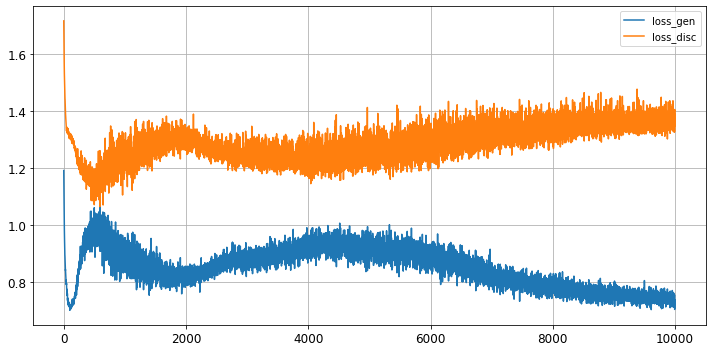

Predicted Values: (1000, 3)
save latent space


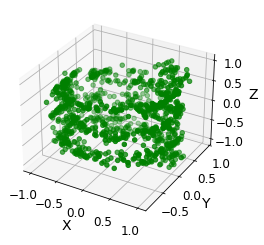

save countour line


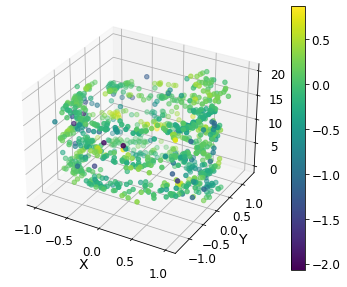

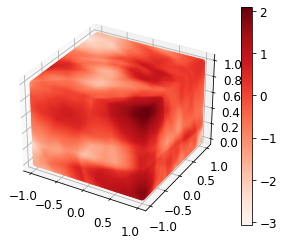

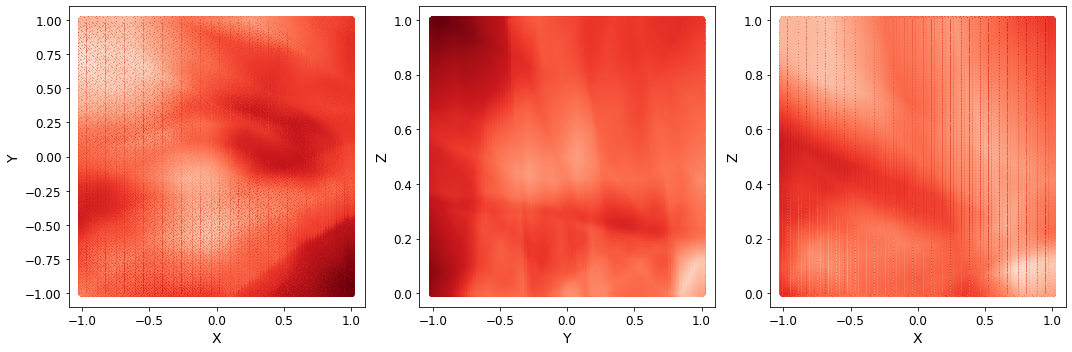

Epoch 10001/30000
Epoch 10002/30000
Epoch 10003/30000
Epoch 10004/30000
Epoch 10005/30000
Epoch 10006/30000
Epoch 10007/30000
Epoch 10008/30000
Epoch 10009/30000
Epoch 10010/30000
Epoch 10011/30000
Epoch 10012/30000
Epoch 10013/30000
Epoch 10014/30000
Epoch 10015/30000
Epoch 10016/30000
Epoch 10017/30000
Epoch 10018/30000
Epoch 10019/30000
Epoch 10020/30000
Epoch 10021/30000
Epoch 10022/30000
Epoch 10023/30000
Epoch 10024/30000
Epoch 10025/30000
Epoch 10026/30000
Epoch 10027/30000
Epoch 10028/30000
Epoch 10029/30000
Epoch 10030/30000
Epoch 10031/30000
Epoch 10032/30000
Epoch 10033/30000
Epoch 10034/30000
Epoch 10035/30000
Epoch 10036/30000
Epoch 10037/30000
Epoch 10038/30000
Epoch 10039/30000
Epoch 10040/30000
Epoch 10041/30000
Epoch 10042/30000
Epoch 10043/30000
Epoch 10044/30000
Epoch 10045/30000
Epoch 10046/30000
Epoch 10047/30000
Epoch 10048/30000
Epoch 10049/30000
Epoch 10050/30000
Epoch 10051/30000
Epoch 10052/30000
Epoch 10053/30000
Epoch 10054/30000
Epoch 10055/30000
Epoch 1005

Epoch 10458/30000
Epoch 10459/30000
Epoch 10460/30000
Epoch 10461/30000
Epoch 10462/30000
Epoch 10463/30000
Epoch 10464/30000
Epoch 10465/30000
Epoch 10466/30000
Epoch 10467/30000
Epoch 10468/30000
Epoch 10469/30000
Epoch 10470/30000
Epoch 10471/30000
Epoch 10472/30000
Epoch 10473/30000
Epoch 10474/30000
Epoch 10475/30000
Epoch 10476/30000
Epoch 10477/30000
Epoch 10478/30000
Epoch 10479/30000
Epoch 10480/30000
Epoch 10481/30000
Epoch 10482/30000
Epoch 10483/30000
Epoch 10484/30000
Epoch 10485/30000
Epoch 10486/30000
Epoch 10487/30000
Epoch 10488/30000
Epoch 10489/30000
Epoch 10490/30000
Epoch 10491/30000
Epoch 10492/30000
Epoch 10493/30000
Epoch 10494/30000
Epoch 10495/30000
Epoch 10496/30000
Epoch 10497/30000
Epoch 10498/30000
Epoch 10499/30000
Epoch 10500/30000
Epoch 10501/30000
Epoch 10502/30000
Epoch 10503/30000
Epoch 10504/30000
Epoch 10505/30000
Epoch 10506/30000
Epoch 10507/30000
Epoch 10508/30000
Epoch 10509/30000
Epoch 10510/30000
Epoch 10511/30000
Epoch 10512/30000
Epoch 1051

Epoch 10916/30000
Epoch 10917/30000
Epoch 10918/30000
Epoch 10919/30000
Epoch 10920/30000
Epoch 10921/30000
Epoch 10922/30000
Epoch 10923/30000
Epoch 10924/30000
Epoch 10925/30000
Epoch 10926/30000
Epoch 10927/30000
Epoch 10928/30000
Epoch 10929/30000
Epoch 10930/30000
Epoch 10931/30000
Epoch 10932/30000
Epoch 10933/30000
Epoch 10934/30000
Epoch 10935/30000
Epoch 10936/30000
Epoch 10937/30000
Epoch 10938/30000
Epoch 10939/30000
Epoch 10940/30000
Epoch 10941/30000
Epoch 10942/30000
Epoch 10943/30000
Epoch 10944/30000
Epoch 10945/30000
Epoch 10946/30000
Epoch 10947/30000
Epoch 10948/30000
Epoch 10949/30000
Epoch 10950/30000
Epoch 10951/30000
Epoch 10952/30000
Epoch 10953/30000
Epoch 10954/30000
Epoch 10955/30000
Epoch 10956/30000
Epoch 10957/30000
Epoch 10958/30000
Epoch 10959/30000
Epoch 10960/30000
Epoch 10961/30000
Epoch 10962/30000
Epoch 10963/30000
Epoch 10964/30000
Epoch 10965/30000
Epoch 10966/30000
Epoch 10967/30000
Epoch 10968/30000
Epoch 10969/30000
Epoch 10970/30000
Epoch 1097

Epoch 11374/30000
Epoch 11375/30000
Epoch 11376/30000
Epoch 11377/30000
Epoch 11378/30000
Epoch 11379/30000
Epoch 11380/30000
Epoch 11381/30000
Epoch 11382/30000
Epoch 11383/30000
Epoch 11384/30000
Epoch 11385/30000
Epoch 11386/30000
Epoch 11387/30000
Epoch 11388/30000
Epoch 11389/30000
Epoch 11390/30000
Epoch 11391/30000
Epoch 11392/30000
Epoch 11393/30000
Epoch 11394/30000
Epoch 11395/30000
Epoch 11396/30000
Epoch 11397/30000
Epoch 11398/30000
Epoch 11399/30000
Epoch 11400/30000
Epoch 11401/30000
Epoch 11402/30000
Epoch 11403/30000
Epoch 11404/30000
Epoch 11405/30000
Epoch 11406/30000
Epoch 11407/30000
Epoch 11408/30000
Epoch 11409/30000
Epoch 11410/30000
Epoch 11411/30000
Epoch 11412/30000
Epoch 11413/30000
Epoch 11414/30000
Epoch 11415/30000
Epoch 11416/30000
Epoch 11417/30000
Epoch 11418/30000
Epoch 11419/30000
Epoch 11420/30000
Epoch 11421/30000
Epoch 11422/30000
Epoch 11423/30000
Epoch 11424/30000
Epoch 11425/30000
Epoch 11426/30000
Epoch 11427/30000
Epoch 11428/30000
Epoch 1142

Epoch 11830/30000
Epoch 11831/30000
Epoch 11832/30000
Epoch 11833/30000
Epoch 11834/30000
Epoch 11835/30000
Epoch 11836/30000
Epoch 11837/30000
Epoch 11838/30000
Epoch 11839/30000
Epoch 11840/30000
Epoch 11841/30000
Epoch 11842/30000
Epoch 11843/30000
Epoch 11844/30000
Epoch 11845/30000
Epoch 11846/30000
Epoch 11847/30000
Epoch 11848/30000
Epoch 11849/30000
Epoch 11850/30000
Epoch 11851/30000
Epoch 11852/30000
Epoch 11853/30000
Epoch 11854/30000
Epoch 11855/30000
Epoch 11856/30000
Epoch 11857/30000
Epoch 11858/30000
Epoch 11859/30000
Epoch 11860/30000
Epoch 11861/30000
Epoch 11862/30000
Epoch 11863/30000
Epoch 11864/30000
Epoch 11865/30000
Epoch 11866/30000
Epoch 11867/30000
Epoch 11868/30000
Epoch 11869/30000
Epoch 11870/30000
Epoch 11871/30000
Epoch 11872/30000
Epoch 11873/30000
Epoch 11874/30000
Epoch 11875/30000
Epoch 11876/30000
Epoch 11877/30000
Epoch 11878/30000
Epoch 11879/30000
Epoch 11880/30000
Epoch 11881/30000
Epoch 11882/30000
Epoch 11883/30000
Epoch 11884/30000
Epoch 1188

Epoch 12289/30000
Epoch 12290/30000
Epoch 12291/30000
Epoch 12292/30000
Epoch 12293/30000
Epoch 12294/30000
Epoch 12295/30000
Epoch 12296/30000
Epoch 12297/30000
Epoch 12298/30000
Epoch 12299/30000
Epoch 12300/30000
Epoch 12301/30000
Epoch 12302/30000
Epoch 12303/30000
Epoch 12304/30000
Epoch 12305/30000
Epoch 12306/30000
Epoch 12307/30000
Epoch 12308/30000
Epoch 12309/30000
Epoch 12310/30000
Epoch 12311/30000
Epoch 12312/30000
Epoch 12313/30000
Epoch 12314/30000
Epoch 12315/30000
Epoch 12316/30000
Epoch 12317/30000
Epoch 12318/30000
Epoch 12319/30000
Epoch 12320/30000
Epoch 12321/30000
Epoch 12322/30000
Epoch 12323/30000
Epoch 12324/30000
Epoch 12325/30000
Epoch 12326/30000
Epoch 12327/30000
Epoch 12328/30000
Epoch 12329/30000
Epoch 12330/30000
Epoch 12331/30000
Epoch 12332/30000
Epoch 12333/30000
Epoch 12334/30000
Epoch 12335/30000
Epoch 12336/30000
Epoch 12337/30000
Epoch 12338/30000
Epoch 12339/30000
Epoch 12340/30000
Epoch 12341/30000
Epoch 12342/30000
Epoch 12343/30000
Epoch 1234

Epoch 12745/30000
Epoch 12746/30000
Epoch 12747/30000
Epoch 12748/30000
Epoch 12749/30000
Epoch 12750/30000
Epoch 12751/30000
Epoch 12752/30000
Epoch 12753/30000
Epoch 12754/30000
Epoch 12755/30000
Epoch 12756/30000
Epoch 12757/30000
Epoch 12758/30000
Epoch 12759/30000
Epoch 12760/30000
Epoch 12761/30000
Epoch 12762/30000
Epoch 12763/30000
Epoch 12764/30000
Epoch 12765/30000
Epoch 12766/30000
Epoch 12767/30000
Epoch 12768/30000
Epoch 12769/30000
Epoch 12770/30000
Epoch 12771/30000
Epoch 12772/30000
Epoch 12773/30000
Epoch 12774/30000
Epoch 12775/30000
Epoch 12776/30000
Epoch 12777/30000
Epoch 12778/30000
Epoch 12779/30000
Epoch 12780/30000
Epoch 12781/30000
Epoch 12782/30000
Epoch 12783/30000
Epoch 12784/30000
Epoch 12785/30000
Epoch 12786/30000
Epoch 12787/30000
Epoch 12788/30000
Epoch 12789/30000
Epoch 12790/30000
Epoch 12791/30000
Epoch 12792/30000
Epoch 12793/30000
Epoch 12794/30000
Epoch 12795/30000
Epoch 12796/30000
Epoch 12797/30000
Epoch 12798/30000
Epoch 12799/30000
Epoch 1280

Epoch 13201/30000
Epoch 13202/30000
Epoch 13203/30000
Epoch 13204/30000
Epoch 13205/30000
Epoch 13206/30000
Epoch 13207/30000
Epoch 13208/30000
Epoch 13209/30000
Epoch 13210/30000
Epoch 13211/30000
Epoch 13212/30000
Epoch 13213/30000
Epoch 13214/30000
Epoch 13215/30000
Epoch 13216/30000
Epoch 13217/30000
Epoch 13218/30000
Epoch 13219/30000
Epoch 13220/30000
Epoch 13221/30000
Epoch 13222/30000
Epoch 13223/30000
Epoch 13224/30000
Epoch 13225/30000
Epoch 13226/30000
Epoch 13227/30000
Epoch 13228/30000
Epoch 13229/30000
Epoch 13230/30000
Epoch 13231/30000
Epoch 13232/30000
Epoch 13233/30000
Epoch 13234/30000
Epoch 13235/30000
Epoch 13236/30000
Epoch 13237/30000
Epoch 13238/30000
Epoch 13239/30000
Epoch 13240/30000
Epoch 13241/30000
Epoch 13242/30000
Epoch 13243/30000
Epoch 13244/30000
Epoch 13245/30000
Epoch 13246/30000
Epoch 13247/30000
Epoch 13248/30000
Epoch 13249/30000
Epoch 13250/30000
Epoch 13251/30000
Epoch 13252/30000
Epoch 13253/30000
Epoch 13254/30000
Epoch 13255/30000
Epoch 1325

Epoch 13659/30000
Epoch 13660/30000
Epoch 13661/30000
Epoch 13662/30000
Epoch 13663/30000
Epoch 13664/30000
Epoch 13665/30000
Epoch 13666/30000
Epoch 13667/30000
Epoch 13668/30000
Epoch 13669/30000
Epoch 13670/30000
Epoch 13671/30000
Epoch 13672/30000
Epoch 13673/30000
Epoch 13674/30000
Epoch 13675/30000
Epoch 13676/30000
Epoch 13677/30000
Epoch 13678/30000
Epoch 13679/30000
Epoch 13680/30000
Epoch 13681/30000
Epoch 13682/30000
Epoch 13683/30000
Epoch 13684/30000
Epoch 13685/30000
Epoch 13686/30000
Epoch 13687/30000
Epoch 13688/30000
Epoch 13689/30000
Epoch 13690/30000
Epoch 13691/30000
Epoch 13692/30000
Epoch 13693/30000
Epoch 13694/30000
Epoch 13695/30000
Epoch 13696/30000
Epoch 13697/30000
Epoch 13698/30000
Epoch 13699/30000
Epoch 13700/30000
Epoch 13701/30000
Epoch 13702/30000
Epoch 13703/30000
Epoch 13704/30000
Epoch 13705/30000
Epoch 13706/30000
Epoch 13707/30000
Epoch 13708/30000
Epoch 13709/30000
Epoch 13710/30000
Epoch 13711/30000
Epoch 13712/30000
Epoch 13713/30000
Epoch 1371

Epoch 14117/30000
Epoch 14118/30000
Epoch 14119/30000
Epoch 14120/30000
Epoch 14121/30000
Epoch 14122/30000
Epoch 14123/30000
Epoch 14124/30000
Epoch 14125/30000
Epoch 14126/30000
Epoch 14127/30000
Epoch 14128/30000
Epoch 14129/30000
Epoch 14130/30000
Epoch 14131/30000
Epoch 14132/30000
Epoch 14133/30000
Epoch 14134/30000
Epoch 14135/30000
Epoch 14136/30000
Epoch 14137/30000
Epoch 14138/30000
Epoch 14139/30000
Epoch 14140/30000
Epoch 14141/30000
Epoch 14142/30000
Epoch 14143/30000
Epoch 14144/30000
Epoch 14145/30000
Epoch 14146/30000
Epoch 14147/30000
Epoch 14148/30000
Epoch 14149/30000
Epoch 14150/30000
Epoch 14151/30000
Epoch 14152/30000
Epoch 14153/30000
Epoch 14154/30000
Epoch 14155/30000
Epoch 14156/30000
Epoch 14157/30000
Epoch 14158/30000
Epoch 14159/30000
Epoch 14160/30000
Epoch 14161/30000
Epoch 14162/30000
Epoch 14163/30000
Epoch 14164/30000
Epoch 14165/30000
Epoch 14166/30000
Epoch 14167/30000
Epoch 14168/30000
Epoch 14169/30000
Epoch 14170/30000
Epoch 14171/30000
Epoch 1417

Epoch 14574/30000
Epoch 14575/30000
Epoch 14576/30000
Epoch 14577/30000
Epoch 14578/30000
Epoch 14579/30000
Epoch 14580/30000
Epoch 14581/30000
Epoch 14582/30000
Epoch 14583/30000
Epoch 14584/30000
Epoch 14585/30000
Epoch 14586/30000
Epoch 14587/30000
Epoch 14588/30000
Epoch 14589/30000
Epoch 14590/30000
Epoch 14591/30000
Epoch 14592/30000
Epoch 14593/30000
Epoch 14594/30000
Epoch 14595/30000
Epoch 14596/30000
Epoch 14597/30000
Epoch 14598/30000
Epoch 14599/30000
Epoch 14600/30000
Epoch 14601/30000
Epoch 14602/30000
Epoch 14603/30000
Epoch 14604/30000
Epoch 14605/30000
Epoch 14606/30000
Epoch 14607/30000
Epoch 14608/30000
Epoch 14609/30000
Epoch 14610/30000
Epoch 14611/30000
Epoch 14612/30000
Epoch 14613/30000
Epoch 14614/30000
Epoch 14615/30000
Epoch 14616/30000
Epoch 14617/30000
Epoch 14618/30000
Epoch 14619/30000
Epoch 14620/30000
Epoch 14621/30000
Epoch 14622/30000
Epoch 14623/30000
Epoch 14624/30000
Epoch 14625/30000
Epoch 14626/30000
Epoch 14627/30000
Epoch 14628/30000
Epoch 1462

Epoch 15032/30000
Epoch 15033/30000
Epoch 15034/30000
Epoch 15035/30000
Epoch 15036/30000
Epoch 15037/30000
Epoch 15038/30000
Epoch 15039/30000
Epoch 15040/30000
Epoch 15041/30000
Epoch 15042/30000
Epoch 15043/30000
Epoch 15044/30000
Epoch 15045/30000
Epoch 15046/30000
Epoch 15047/30000
Epoch 15048/30000
Epoch 15049/30000
Epoch 15050/30000
Epoch 15051/30000
Epoch 15052/30000
Epoch 15053/30000
Epoch 15054/30000
Epoch 15055/30000
Epoch 15056/30000
Epoch 15057/30000
Epoch 15058/30000
Epoch 15059/30000
Epoch 15060/30000
Epoch 15061/30000
Epoch 15062/30000
Epoch 15063/30000
Epoch 15064/30000
Epoch 15065/30000
Epoch 15066/30000
Epoch 15067/30000
Epoch 15068/30000
Epoch 15069/30000
Epoch 15070/30000
Epoch 15071/30000
Epoch 15072/30000
Epoch 15073/30000
Epoch 15074/30000
Epoch 15075/30000
Epoch 15076/30000
Epoch 15077/30000
Epoch 15078/30000
Epoch 15079/30000
Epoch 15080/30000
Epoch 15081/30000
Epoch 15082/30000
Epoch 15083/30000
Epoch 15084/30000
Epoch 15085/30000
Epoch 15086/30000
Epoch 1508

Epoch 15490/30000
Epoch 15491/30000
Epoch 15492/30000
Epoch 15493/30000
Epoch 15494/30000
Epoch 15495/30000
Epoch 15496/30000
Epoch 15497/30000
Epoch 15498/30000
Epoch 15499/30000
Epoch 15500/30000
Epoch 15501/30000
Epoch 15502/30000
Epoch 15503/30000
Epoch 15504/30000
Epoch 15505/30000
Epoch 15506/30000
Epoch 15507/30000
Epoch 15508/30000
Epoch 15509/30000
Epoch 15510/30000
Epoch 15511/30000
Epoch 15512/30000
Epoch 15513/30000
Epoch 15514/30000
Epoch 15515/30000
Epoch 15516/30000
Epoch 15517/30000
Epoch 15518/30000
Epoch 15519/30000
Epoch 15520/30000
Epoch 15521/30000
Epoch 15522/30000
Epoch 15523/30000
Epoch 15524/30000
Epoch 15525/30000
Epoch 15526/30000
Epoch 15527/30000
Epoch 15528/30000
Epoch 15529/30000
Epoch 15530/30000
Epoch 15531/30000
Epoch 15532/30000
Epoch 15533/30000
Epoch 15534/30000
Epoch 15535/30000
Epoch 15536/30000
Epoch 15537/30000
Epoch 15538/30000
Epoch 15539/30000
Epoch 15540/30000
Epoch 15541/30000
Epoch 15542/30000
Epoch 15543/30000
Epoch 15544/30000
Epoch 1554

Epoch 15948/30000
Epoch 15949/30000
Epoch 15950/30000
Epoch 15951/30000
Epoch 15952/30000
Epoch 15953/30000
Epoch 15954/30000
Epoch 15955/30000
Epoch 15956/30000
Epoch 15957/30000
Epoch 15958/30000
Epoch 15959/30000
Epoch 15960/30000
Epoch 15961/30000
Epoch 15962/30000
Epoch 15963/30000
Epoch 15964/30000
Epoch 15965/30000
Epoch 15966/30000
Epoch 15967/30000
Epoch 15968/30000
Epoch 15969/30000
Epoch 15970/30000
Epoch 15971/30000
Epoch 15972/30000
Epoch 15973/30000
Epoch 15974/30000
Epoch 15975/30000
Epoch 15976/30000
Epoch 15977/30000
Epoch 15978/30000
Epoch 15979/30000
Epoch 15980/30000
Epoch 15981/30000
Epoch 15982/30000
Epoch 15983/30000
Epoch 15984/30000
Epoch 15985/30000
Epoch 15986/30000
Epoch 15987/30000
Epoch 15988/30000
Epoch 15989/30000
Epoch 15990/30000
Epoch 15991/30000
Epoch 15992/30000
Epoch 15993/30000
Epoch 15994/30000
Epoch 15995/30000
Epoch 15996/30000
Epoch 15997/30000
Epoch 15998/30000
Epoch 15999/30000
Epoch 16000/30000
Epoch 16001/30000
Epoch 16002/30000
Epoch 1600

Epoch 16406/30000
Epoch 16407/30000
Epoch 16408/30000
Epoch 16409/30000
Epoch 16410/30000
Epoch 16411/30000
Epoch 16412/30000
Epoch 16413/30000
Epoch 16414/30000
Epoch 16415/30000
Epoch 16416/30000
Epoch 16417/30000
Epoch 16418/30000
Epoch 16419/30000
Epoch 16420/30000
Epoch 16421/30000
Epoch 16422/30000
Epoch 16423/30000
Epoch 16424/30000
Epoch 16425/30000
Epoch 16426/30000
Epoch 16427/30000
Epoch 16428/30000
Epoch 16429/30000
Epoch 16430/30000
Epoch 16431/30000
Epoch 16432/30000
Epoch 16433/30000
Epoch 16434/30000
Epoch 16435/30000
Epoch 16436/30000
Epoch 16437/30000
Epoch 16438/30000
Epoch 16439/30000
Epoch 16440/30000
Epoch 16441/30000
Epoch 16442/30000
Epoch 16443/30000
Epoch 16444/30000
Epoch 16445/30000
Epoch 16446/30000
Epoch 16447/30000
Epoch 16448/30000
Epoch 16449/30000
Epoch 16450/30000
Epoch 16451/30000
Epoch 16452/30000
Epoch 16453/30000
Epoch 16454/30000
Epoch 16455/30000
Epoch 16456/30000
Epoch 16457/30000
Epoch 16458/30000
Epoch 16459/30000
Epoch 16460/30000
Epoch 1646

Epoch 16864/30000
Epoch 16865/30000
Epoch 16866/30000
Epoch 16867/30000
Epoch 16868/30000
Epoch 16869/30000
Epoch 16870/30000
Epoch 16871/30000
Epoch 16872/30000
Epoch 16873/30000
Epoch 16874/30000
Epoch 16875/30000
Epoch 16876/30000
Epoch 16877/30000
Epoch 16878/30000
Epoch 16879/30000
Epoch 16880/30000
Epoch 16881/30000
Epoch 16882/30000
Epoch 16883/30000
Epoch 16884/30000
Epoch 16885/30000
Epoch 16886/30000
Epoch 16887/30000
Epoch 16888/30000
Epoch 16889/30000
Epoch 16890/30000
Epoch 16891/30000
Epoch 16892/30000
Epoch 16893/30000
Epoch 16894/30000
Epoch 16895/30000
Epoch 16896/30000
Epoch 16897/30000
Epoch 16898/30000
Epoch 16899/30000
Epoch 16900/30000
Epoch 16901/30000
Epoch 16902/30000
Epoch 16903/30000
Epoch 16904/30000
Epoch 16905/30000
Epoch 16906/30000
Epoch 16907/30000
Epoch 16908/30000
Epoch 16909/30000
Epoch 16910/30000
Epoch 16911/30000
Epoch 16912/30000
Epoch 16913/30000
Epoch 16914/30000
Epoch 16915/30000
Epoch 16916/30000
Epoch 16917/30000
Epoch 16918/30000
Epoch 1691

Epoch 17322/30000
Epoch 17323/30000
Epoch 17324/30000
Epoch 17325/30000
Epoch 17326/30000
Epoch 17327/30000
Epoch 17328/30000
Epoch 17329/30000
Epoch 17330/30000
Epoch 17331/30000
Epoch 17332/30000
Epoch 17333/30000
Epoch 17334/30000
Epoch 17335/30000
Epoch 17336/30000
Epoch 17337/30000
Epoch 17338/30000
Epoch 17339/30000
Epoch 17340/30000
Epoch 17341/30000
Epoch 17342/30000
Epoch 17343/30000
Epoch 17344/30000
Epoch 17345/30000
Epoch 17346/30000
Epoch 17347/30000
Epoch 17348/30000
Epoch 17349/30000
Epoch 17350/30000
Epoch 17351/30000
Epoch 17352/30000
Epoch 17353/30000
Epoch 17354/30000
Epoch 17355/30000
Epoch 17356/30000
Epoch 17357/30000
Epoch 17358/30000
Epoch 17359/30000
Epoch 17360/30000
Epoch 17361/30000
Epoch 17362/30000
Epoch 17363/30000
Epoch 17364/30000
Epoch 17365/30000
Epoch 17366/30000
Epoch 17367/30000
Epoch 17368/30000
Epoch 17369/30000
Epoch 17370/30000
Epoch 17371/30000
Epoch 17372/30000
Epoch 17373/30000
Epoch 17374/30000
Epoch 17375/30000
Epoch 17376/30000
Epoch 1737

Epoch 17779/30000
Epoch 17780/30000
Epoch 17781/30000
Epoch 17782/30000
Epoch 17783/30000
Epoch 17784/30000
Epoch 17785/30000
Epoch 17786/30000
Epoch 17787/30000
Epoch 17788/30000
Epoch 17789/30000
Epoch 17790/30000
Epoch 17791/30000
Epoch 17792/30000
Epoch 17793/30000
Epoch 17794/30000
Epoch 17795/30000
Epoch 17796/30000
Epoch 17797/30000
Epoch 17798/30000
Epoch 17799/30000
Epoch 17800/30000
Epoch 17801/30000
Epoch 17802/30000
Epoch 17803/30000
Epoch 17804/30000
Epoch 17805/30000
Epoch 17806/30000
Epoch 17807/30000
Epoch 17808/30000
Epoch 17809/30000
Epoch 17810/30000
Epoch 17811/30000
Epoch 17812/30000
Epoch 17813/30000
Epoch 17814/30000
Epoch 17815/30000
Epoch 17816/30000
Epoch 17817/30000
Epoch 17818/30000
Epoch 17819/30000
Epoch 17820/30000
Epoch 17821/30000
Epoch 17822/30000
Epoch 17823/30000
Epoch 17824/30000
Epoch 17825/30000
Epoch 17826/30000
Epoch 17827/30000
Epoch 17828/30000
Epoch 17829/30000
Epoch 17830/30000
Epoch 17831/30000
Epoch 17832/30000
Epoch 17833/30000
Epoch 1783

Epoch 18235/30000
Epoch 18236/30000
Epoch 18237/30000
Epoch 18238/30000
Epoch 18239/30000
Epoch 18240/30000
Epoch 18241/30000
Epoch 18242/30000
Epoch 18243/30000
Epoch 18244/30000
Epoch 18245/30000
Epoch 18246/30000
Epoch 18247/30000
Epoch 18248/30000
Epoch 18249/30000
Epoch 18250/30000
Epoch 18251/30000
Epoch 18252/30000
Epoch 18253/30000
Epoch 18254/30000
Epoch 18255/30000
Epoch 18256/30000
Epoch 18257/30000
Epoch 18258/30000
Epoch 18259/30000
Epoch 18260/30000
Epoch 18261/30000
Epoch 18262/30000
Epoch 18263/30000
Epoch 18264/30000
Epoch 18265/30000
Epoch 18266/30000
Epoch 18267/30000
Epoch 18268/30000
Epoch 18269/30000
Epoch 18270/30000
Epoch 18271/30000
Epoch 18272/30000
Epoch 18273/30000
Epoch 18274/30000
Epoch 18275/30000
Epoch 18276/30000
Epoch 18277/30000
Epoch 18278/30000
Epoch 18279/30000
Epoch 18280/30000
Epoch 18281/30000
Epoch 18282/30000
Epoch 18283/30000
Epoch 18284/30000
Epoch 18285/30000
Epoch 18286/30000
Epoch 18287/30000
Epoch 18288/30000
Epoch 18289/30000
Epoch 1829

Epoch 18691/30000
Epoch 18692/30000
Epoch 18693/30000
Epoch 18694/30000
Epoch 18695/30000
Epoch 18696/30000
Epoch 18697/30000
Epoch 18698/30000
Epoch 18699/30000
Epoch 18700/30000
Epoch 18701/30000
Epoch 18702/30000
Epoch 18703/30000
Epoch 18704/30000
Epoch 18705/30000
Epoch 18706/30000
Epoch 18707/30000
Epoch 18708/30000
Epoch 18709/30000
Epoch 18710/30000
Epoch 18711/30000
Epoch 18712/30000
Epoch 18713/30000
Epoch 18714/30000
Epoch 18715/30000
Epoch 18716/30000
Epoch 18717/30000
Epoch 18718/30000
Epoch 18719/30000
Epoch 18720/30000
Epoch 18721/30000
Epoch 18722/30000
Epoch 18723/30000
Epoch 18724/30000
Epoch 18725/30000
Epoch 18726/30000
Epoch 18727/30000
Epoch 18728/30000
Epoch 18729/30000
Epoch 18730/30000
Epoch 18731/30000
Epoch 18732/30000
Epoch 18733/30000
Epoch 18734/30000
Epoch 18735/30000
Epoch 18736/30000
Epoch 18737/30000
Epoch 18738/30000
Epoch 18739/30000
Epoch 18740/30000
Epoch 18741/30000
Epoch 18742/30000
Epoch 18743/30000
Epoch 18744/30000
Epoch 18745/30000
Epoch 1874

Epoch 19147/30000
Epoch 19148/30000
Epoch 19149/30000
Epoch 19150/30000
Epoch 19151/30000
Epoch 19152/30000
Epoch 19153/30000
Epoch 19154/30000
Epoch 19155/30000
Epoch 19156/30000
Epoch 19157/30000
Epoch 19158/30000
Epoch 19159/30000
Epoch 19160/30000
Epoch 19161/30000
Epoch 19162/30000
Epoch 19163/30000
Epoch 19164/30000
Epoch 19165/30000
Epoch 19166/30000
Epoch 19167/30000
Epoch 19168/30000
Epoch 19169/30000
Epoch 19170/30000
Epoch 19171/30000
Epoch 19172/30000
Epoch 19173/30000
Epoch 19174/30000
Epoch 19175/30000
Epoch 19176/30000
Epoch 19177/30000
Epoch 19178/30000
Epoch 19179/30000
Epoch 19180/30000
Epoch 19181/30000
Epoch 19182/30000
Epoch 19183/30000
Epoch 19184/30000
Epoch 19185/30000
Epoch 19186/30000
Epoch 19187/30000
Epoch 19188/30000
Epoch 19189/30000
Epoch 19190/30000
Epoch 19191/30000
Epoch 19192/30000
Epoch 19193/30000
Epoch 19194/30000
Epoch 19195/30000
Epoch 19196/30000
Epoch 19197/30000
Epoch 19198/30000
Epoch 19199/30000
Epoch 19200/30000
Epoch 19201/30000
Epoch 1920

Epoch 19603/30000
Epoch 19604/30000
Epoch 19605/30000
Epoch 19606/30000
Epoch 19607/30000
Epoch 19608/30000
Epoch 19609/30000
Epoch 19610/30000
Epoch 19611/30000
Epoch 19612/30000
Epoch 19613/30000
Epoch 19614/30000
Epoch 19615/30000
Epoch 19616/30000
Epoch 19617/30000
Epoch 19618/30000
Epoch 19619/30000
Epoch 19620/30000
Epoch 19621/30000
Epoch 19622/30000
Epoch 19623/30000
Epoch 19624/30000
Epoch 19625/30000
Epoch 19626/30000
Epoch 19627/30000
Epoch 19628/30000
Epoch 19629/30000
Epoch 19630/30000
Epoch 19631/30000
Epoch 19632/30000
Epoch 19633/30000
Epoch 19634/30000
Epoch 19635/30000
Epoch 19636/30000
Epoch 19637/30000
Epoch 19638/30000
Epoch 19639/30000
Epoch 19640/30000
Epoch 19641/30000
Epoch 19642/30000
Epoch 19643/30000
Epoch 19644/30000
Epoch 19645/30000
Epoch 19646/30000
Epoch 19647/30000
Epoch 19648/30000
Epoch 19649/30000
Epoch 19650/30000
Epoch 19651/30000
Epoch 19652/30000
Epoch 19653/30000
Epoch 19654/30000
Epoch 19655/30000
Epoch 19656/30000
Epoch 19657/30000
Epoch 1965

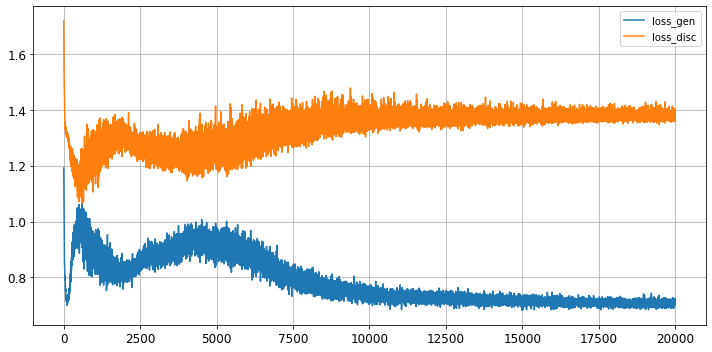

Predicted Values: (1000, 3)
save latent space


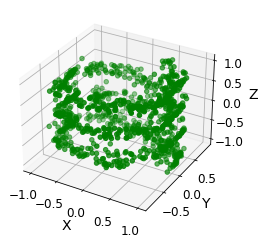

save countour line


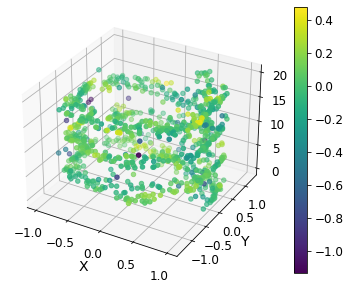

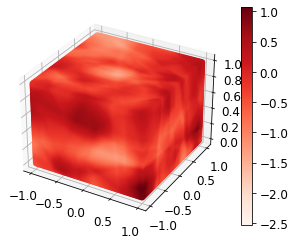

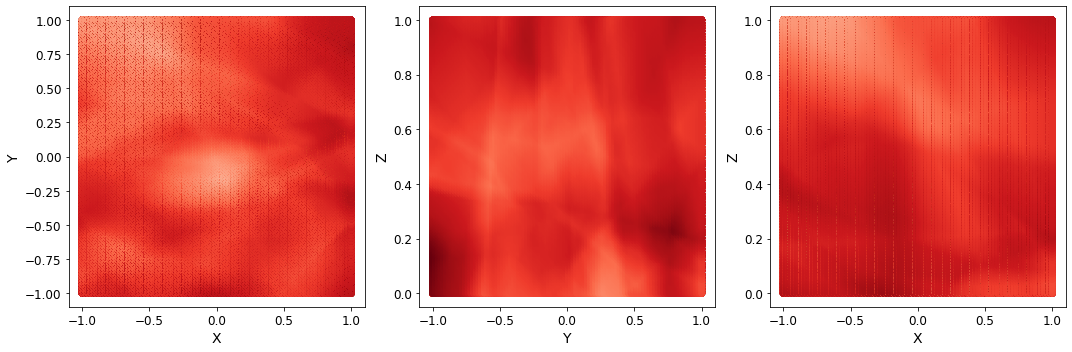

Epoch 20001/30000
Epoch 20002/30000
Epoch 20003/30000
Epoch 20004/30000
Epoch 20005/30000
Epoch 20006/30000
Epoch 20007/30000
Epoch 20008/30000
Epoch 20009/30000
Epoch 20010/30000
Epoch 20011/30000
Epoch 20012/30000
Epoch 20013/30000
Epoch 20014/30000
Epoch 20015/30000
Epoch 20016/30000
Epoch 20017/30000
Epoch 20018/30000
Epoch 20019/30000
Epoch 20020/30000
Epoch 20021/30000
Epoch 20022/30000
Epoch 20023/30000
Epoch 20024/30000
Epoch 20025/30000
Epoch 20026/30000
Epoch 20027/30000
Epoch 20028/30000
Epoch 20029/30000
Epoch 20030/30000
Epoch 20031/30000
Epoch 20032/30000
Epoch 20033/30000
Epoch 20034/30000
Epoch 20035/30000
Epoch 20036/30000
Epoch 20037/30000
Epoch 20038/30000
Epoch 20039/30000
Epoch 20040/30000
Epoch 20041/30000
Epoch 20042/30000
Epoch 20043/30000
Epoch 20044/30000
Epoch 20045/30000
Epoch 20046/30000
Epoch 20047/30000
Epoch 20048/30000
Epoch 20049/30000
Epoch 20050/30000
Epoch 20051/30000
Epoch 20052/30000
Epoch 20053/30000
Epoch 20054/30000
Epoch 20055/30000
Epoch 2005

Epoch 20460/30000
Epoch 20461/30000
Epoch 20462/30000
Epoch 20463/30000
Epoch 20464/30000
Epoch 20465/30000
Epoch 20466/30000
Epoch 20467/30000
Epoch 20468/30000
Epoch 20469/30000
Epoch 20470/30000
Epoch 20471/30000
Epoch 20472/30000
Epoch 20473/30000
Epoch 20474/30000
Epoch 20475/30000
Epoch 20476/30000
Epoch 20477/30000
Epoch 20478/30000
Epoch 20479/30000
Epoch 20480/30000
Epoch 20481/30000
Epoch 20482/30000
Epoch 20483/30000
Epoch 20484/30000
Epoch 20485/30000
Epoch 20486/30000
Epoch 20487/30000
Epoch 20488/30000
Epoch 20489/30000
Epoch 20490/30000
Epoch 20491/30000
Epoch 20492/30000
Epoch 20493/30000
Epoch 20494/30000
Epoch 20495/30000
Epoch 20496/30000
Epoch 20497/30000
Epoch 20498/30000
Epoch 20499/30000
Epoch 20500/30000
Epoch 20501/30000
Epoch 20502/30000
Epoch 20503/30000
Epoch 20504/30000
Epoch 20505/30000
Epoch 20506/30000
Epoch 20507/30000
Epoch 20508/30000
Epoch 20509/30000
Epoch 20510/30000
Epoch 20511/30000
Epoch 20512/30000
Epoch 20513/30000
Epoch 20514/30000
Epoch 2051

Epoch 20919/30000
Epoch 20920/30000
Epoch 20921/30000
Epoch 20922/30000
Epoch 20923/30000
Epoch 20924/30000
Epoch 20925/30000
Epoch 20926/30000
Epoch 20927/30000
Epoch 20928/30000
Epoch 20929/30000
Epoch 20930/30000
Epoch 20931/30000
Epoch 20932/30000
Epoch 20933/30000
Epoch 20934/30000
Epoch 20935/30000
Epoch 20936/30000
Epoch 20937/30000
Epoch 20938/30000
Epoch 20939/30000
Epoch 20940/30000
Epoch 20941/30000
Epoch 20942/30000
Epoch 20943/30000
Epoch 20944/30000
Epoch 20945/30000
Epoch 20946/30000
Epoch 20947/30000
Epoch 20948/30000
Epoch 20949/30000
Epoch 20950/30000
Epoch 20951/30000
Epoch 20952/30000
Epoch 20953/30000
Epoch 20954/30000
Epoch 20955/30000
Epoch 20956/30000
Epoch 20957/30000
Epoch 20958/30000
Epoch 20959/30000
Epoch 20960/30000
Epoch 20961/30000
Epoch 20962/30000
Epoch 20963/30000
Epoch 20964/30000
Epoch 20965/30000
Epoch 20966/30000
Epoch 20967/30000
Epoch 20968/30000
Epoch 20969/30000
Epoch 20970/30000
Epoch 20971/30000
Epoch 20972/30000
Epoch 20973/30000
Epoch 2097

Epoch 21379/30000
Epoch 21380/30000
Epoch 21381/30000
Epoch 21382/30000
Epoch 21383/30000
Epoch 21384/30000
Epoch 21385/30000
Epoch 21386/30000
Epoch 21387/30000
Epoch 21388/30000
Epoch 21389/30000
Epoch 21390/30000
Epoch 21391/30000
Epoch 21392/30000
Epoch 21393/30000
Epoch 21394/30000
Epoch 21395/30000
Epoch 21396/30000
Epoch 21397/30000
Epoch 21398/30000
Epoch 21399/30000
Epoch 21400/30000
Epoch 21401/30000
Epoch 21402/30000
Epoch 21403/30000
Epoch 21404/30000
Epoch 21405/30000
Epoch 21406/30000
Epoch 21407/30000
Epoch 21408/30000
Epoch 21409/30000
Epoch 21410/30000
Epoch 21411/30000
Epoch 21412/30000
Epoch 21413/30000
Epoch 21414/30000
Epoch 21415/30000
Epoch 21416/30000
Epoch 21417/30000
Epoch 21418/30000
Epoch 21419/30000
Epoch 21420/30000
Epoch 21421/30000
Epoch 21422/30000
Epoch 21423/30000
Epoch 21424/30000
Epoch 21425/30000
Epoch 21426/30000
Epoch 21427/30000
Epoch 21428/30000
Epoch 21429/30000
Epoch 21430/30000
Epoch 21431/30000
Epoch 21432/30000
Epoch 21433/30000
Epoch 2143

Epoch 21837/30000
Epoch 21838/30000
Epoch 21839/30000
Epoch 21840/30000
Epoch 21841/30000
Epoch 21842/30000
Epoch 21843/30000
Epoch 21844/30000
Epoch 21845/30000
Epoch 21846/30000
Epoch 21847/30000
Epoch 21848/30000
Epoch 21849/30000
Epoch 21850/30000
Epoch 21851/30000
Epoch 21852/30000
Epoch 21853/30000
Epoch 21854/30000
Epoch 21855/30000
Epoch 21856/30000
Epoch 21857/30000
Epoch 21858/30000
Epoch 21859/30000
Epoch 21860/30000
Epoch 21861/30000
Epoch 21862/30000
Epoch 21863/30000
Epoch 21864/30000
Epoch 21865/30000
Epoch 21866/30000
Epoch 21867/30000
Epoch 21868/30000
Epoch 21869/30000
Epoch 21870/30000
Epoch 21871/30000
Epoch 21872/30000
Epoch 21873/30000
Epoch 21874/30000
Epoch 21875/30000
Epoch 21876/30000
Epoch 21877/30000
Epoch 21878/30000
Epoch 21879/30000
Epoch 21880/30000
Epoch 21881/30000
Epoch 21882/30000
Epoch 21883/30000
Epoch 21884/30000
Epoch 21885/30000
Epoch 21886/30000
Epoch 21887/30000
Epoch 21888/30000
Epoch 21889/30000
Epoch 21890/30000
Epoch 21891/30000
Epoch 2189

Epoch 22294/30000
Epoch 22295/30000
Epoch 22296/30000
Epoch 22297/30000
Epoch 22298/30000
Epoch 22299/30000
Epoch 22300/30000
Epoch 22301/30000
Epoch 22302/30000
Epoch 22303/30000
Epoch 22304/30000
Epoch 22305/30000
Epoch 22306/30000
Epoch 22307/30000
Epoch 22308/30000
Epoch 22309/30000
Epoch 22310/30000
Epoch 22311/30000
Epoch 22312/30000
Epoch 22313/30000
Epoch 22314/30000
Epoch 22315/30000
Epoch 22316/30000
Epoch 22317/30000
Epoch 22318/30000
Epoch 22319/30000
Epoch 22320/30000
Epoch 22321/30000
Epoch 22322/30000
Epoch 22323/30000
Epoch 22324/30000
Epoch 22325/30000
Epoch 22326/30000
Epoch 22327/30000
Epoch 22328/30000
Epoch 22329/30000
Epoch 22330/30000
Epoch 22331/30000
Epoch 22332/30000
Epoch 22333/30000
Epoch 22334/30000
Epoch 22335/30000
Epoch 22336/30000
Epoch 22337/30000
Epoch 22338/30000
Epoch 22339/30000
Epoch 22340/30000
Epoch 22341/30000
Epoch 22342/30000
Epoch 22343/30000
Epoch 22344/30000
Epoch 22345/30000
Epoch 22346/30000
Epoch 22347/30000
Epoch 22348/30000
Epoch 2234

Epoch 22752/30000
Epoch 22753/30000
Epoch 22754/30000
Epoch 22755/30000
Epoch 22756/30000
Epoch 22757/30000
Epoch 22758/30000
Epoch 22759/30000
Epoch 22760/30000
Epoch 22761/30000
Epoch 22762/30000
Epoch 22763/30000
Epoch 22764/30000
Epoch 22765/30000
Epoch 22766/30000
Epoch 22767/30000
Epoch 22768/30000
Epoch 22769/30000
Epoch 22770/30000
Epoch 22771/30000
Epoch 22772/30000
Epoch 22773/30000
Epoch 22774/30000
Epoch 22775/30000
Epoch 22776/30000
Epoch 22777/30000
Epoch 22778/30000
Epoch 22779/30000
Epoch 22780/30000
Epoch 22781/30000
Epoch 22782/30000
Epoch 22783/30000
Epoch 22784/30000
Epoch 22785/30000
Epoch 22786/30000
Epoch 22787/30000
Epoch 22788/30000
Epoch 22789/30000
Epoch 22790/30000
Epoch 22791/30000
Epoch 22792/30000
Epoch 22793/30000
Epoch 22794/30000
Epoch 22795/30000
Epoch 22796/30000
Epoch 22797/30000
Epoch 22798/30000
Epoch 22799/30000
Epoch 22800/30000
Epoch 22801/30000
Epoch 22802/30000
Epoch 22803/30000
Epoch 22804/30000
Epoch 22805/30000
Epoch 22806/30000
Epoch 2280

Epoch 23210/30000
Epoch 23211/30000
Epoch 23212/30000
Epoch 23213/30000
Epoch 23214/30000
Epoch 23215/30000
Epoch 23216/30000
Epoch 23217/30000
Epoch 23218/30000
Epoch 23219/30000
Epoch 23220/30000
Epoch 23221/30000
Epoch 23222/30000
Epoch 23223/30000
Epoch 23224/30000
Epoch 23225/30000
Epoch 23226/30000
Epoch 23227/30000
Epoch 23228/30000
Epoch 23229/30000
Epoch 23230/30000
Epoch 23231/30000
Epoch 23232/30000
Epoch 23233/30000
Epoch 23234/30000
Epoch 23235/30000
Epoch 23236/30000
Epoch 23237/30000
Epoch 23238/30000
Epoch 23239/30000
Epoch 23240/30000
Epoch 23241/30000
Epoch 23242/30000
Epoch 23243/30000
Epoch 23244/30000
Epoch 23245/30000
Epoch 23246/30000
Epoch 23247/30000
Epoch 23248/30000
Epoch 23249/30000
Epoch 23250/30000
Epoch 23251/30000
Epoch 23252/30000
Epoch 23253/30000
Epoch 23254/30000
Epoch 23255/30000
Epoch 23256/30000
Epoch 23257/30000
Epoch 23258/30000
Epoch 23259/30000
Epoch 23260/30000
Epoch 23261/30000
Epoch 23262/30000
Epoch 23263/30000
Epoch 23264/30000
Epoch 2326

Epoch 23669/30000
Epoch 23670/30000
Epoch 23671/30000
Epoch 23672/30000
Epoch 23673/30000
Epoch 23674/30000
Epoch 23675/30000
Epoch 23676/30000
Epoch 23677/30000
Epoch 23678/30000
Epoch 23679/30000
Epoch 23680/30000
Epoch 23681/30000
Epoch 23682/30000
Epoch 23683/30000
Epoch 23684/30000
Epoch 23685/30000
Epoch 23686/30000
Epoch 23687/30000
Epoch 23688/30000
Epoch 23689/30000
Epoch 23690/30000
Epoch 23691/30000
Epoch 23692/30000
Epoch 23693/30000
Epoch 23694/30000
Epoch 23695/30000
Epoch 23696/30000
Epoch 23697/30000
Epoch 23698/30000
Epoch 23699/30000
Epoch 23700/30000
Epoch 23701/30000
Epoch 23702/30000
Epoch 23703/30000
Epoch 23704/30000
Epoch 23705/30000
Epoch 23706/30000
Epoch 23707/30000
Epoch 23708/30000
Epoch 23709/30000
Epoch 23710/30000
Epoch 23711/30000
Epoch 23712/30000
Epoch 23713/30000
Epoch 23714/30000
Epoch 23715/30000
Epoch 23716/30000
Epoch 23717/30000
Epoch 23718/30000
Epoch 23719/30000
Epoch 23720/30000
Epoch 23721/30000
Epoch 23722/30000
Epoch 23723/30000
Epoch 2372

Epoch 24125/30000
Epoch 24126/30000
Epoch 24127/30000
Epoch 24128/30000
Epoch 24129/30000
Epoch 24130/30000
Epoch 24131/30000
Epoch 24132/30000
Epoch 24133/30000
Epoch 24134/30000
Epoch 24135/30000
Epoch 24136/30000
Epoch 24137/30000
Epoch 24138/30000
Epoch 24139/30000
Epoch 24140/30000
Epoch 24141/30000
Epoch 24142/30000
Epoch 24143/30000
Epoch 24144/30000
Epoch 24145/30000
Epoch 24146/30000
Epoch 24147/30000
Epoch 24148/30000
Epoch 24149/30000
Epoch 24150/30000
Epoch 24151/30000
Epoch 24152/30000
Epoch 24153/30000
Epoch 24154/30000
Epoch 24155/30000
Epoch 24156/30000
Epoch 24157/30000
Epoch 24158/30000
Epoch 24159/30000
Epoch 24160/30000
Epoch 24161/30000
Epoch 24162/30000
Epoch 24163/30000
Epoch 24164/30000
Epoch 24165/30000
Epoch 24166/30000
Epoch 24167/30000
Epoch 24168/30000
Epoch 24169/30000
Epoch 24170/30000
Epoch 24171/30000
Epoch 24172/30000
Epoch 24173/30000
Epoch 24174/30000
Epoch 24175/30000
Epoch 24176/30000
Epoch 24177/30000
Epoch 24178/30000
Epoch 24179/30000
Epoch 2418

Epoch 24582/30000
Epoch 24583/30000
Epoch 24584/30000
Epoch 24585/30000
Epoch 24586/30000
Epoch 24587/30000
Epoch 24588/30000
Epoch 24589/30000
Epoch 24590/30000
Epoch 24591/30000
Epoch 24592/30000
Epoch 24593/30000
Epoch 24594/30000
Epoch 24595/30000
Epoch 24596/30000
Epoch 24597/30000
Epoch 24598/30000
Epoch 24599/30000
Epoch 24600/30000
Epoch 24601/30000
Epoch 24602/30000
Epoch 24603/30000
Epoch 24604/30000
Epoch 24605/30000
Epoch 24606/30000
Epoch 24607/30000
Epoch 24608/30000
Epoch 24609/30000
Epoch 24610/30000
Epoch 24611/30000
Epoch 24612/30000
Epoch 24613/30000
Epoch 24614/30000
Epoch 24615/30000
Epoch 24616/30000
Epoch 24617/30000
Epoch 24618/30000
Epoch 24619/30000
Epoch 24620/30000
Epoch 24621/30000
Epoch 24622/30000
Epoch 24623/30000
Epoch 24624/30000
Epoch 24625/30000
Epoch 24626/30000
Epoch 24627/30000
Epoch 24628/30000
Epoch 24629/30000
Epoch 24630/30000
Epoch 24631/30000
Epoch 24632/30000
Epoch 24633/30000
Epoch 24634/30000
Epoch 24635/30000
Epoch 24636/30000
Epoch 2463

Epoch 25039/30000
Epoch 25040/30000
Epoch 25041/30000
Epoch 25042/30000
Epoch 25043/30000
Epoch 25044/30000
Epoch 25045/30000
Epoch 25046/30000
Epoch 25047/30000
Epoch 25048/30000
Epoch 25049/30000
Epoch 25050/30000
Epoch 25051/30000
Epoch 25052/30000
Epoch 25053/30000
Epoch 25054/30000
Epoch 25055/30000
Epoch 25056/30000
Epoch 25057/30000
Epoch 25058/30000
Epoch 25059/30000
Epoch 25060/30000
Epoch 25061/30000
Epoch 25062/30000
Epoch 25063/30000
Epoch 25064/30000
Epoch 25065/30000
Epoch 25066/30000
Epoch 25067/30000
Epoch 25068/30000
Epoch 25069/30000
Epoch 25070/30000
Epoch 25071/30000
Epoch 25072/30000
Epoch 25073/30000
Epoch 25074/30000
Epoch 25075/30000
Epoch 25076/30000
Epoch 25077/30000
Epoch 25078/30000
Epoch 25079/30000
Epoch 25080/30000
Epoch 25081/30000
Epoch 25082/30000
Epoch 25083/30000
Epoch 25084/30000
Epoch 25085/30000
Epoch 25086/30000
Epoch 25087/30000
Epoch 25088/30000
Epoch 25089/30000
Epoch 25090/30000
Epoch 25091/30000
Epoch 25092/30000
Epoch 25093/30000
Epoch 2509

Epoch 25497/30000
Epoch 25498/30000
Epoch 25499/30000
Epoch 25500/30000
Epoch 25501/30000
Epoch 25502/30000
Epoch 25503/30000
Epoch 25504/30000
Epoch 25505/30000
Epoch 25506/30000
Epoch 25507/30000
Epoch 25508/30000
Epoch 25509/30000
Epoch 25510/30000
Epoch 25511/30000
Epoch 25512/30000
Epoch 25513/30000
Epoch 25514/30000
Epoch 25515/30000
Epoch 25516/30000
Epoch 25517/30000
Epoch 25518/30000
Epoch 25519/30000
Epoch 25520/30000
Epoch 25521/30000
Epoch 25522/30000
Epoch 25523/30000
Epoch 25524/30000
Epoch 25525/30000
Epoch 25526/30000
Epoch 25527/30000
Epoch 25528/30000
Epoch 25529/30000
Epoch 25530/30000
Epoch 25531/30000
Epoch 25532/30000
Epoch 25533/30000
Epoch 25534/30000
Epoch 25535/30000
Epoch 25536/30000
Epoch 25537/30000
Epoch 25538/30000
Epoch 25539/30000
Epoch 25540/30000
Epoch 25541/30000
Epoch 25542/30000
Epoch 25543/30000
Epoch 25544/30000
Epoch 25545/30000
Epoch 25546/30000
Epoch 25547/30000
Epoch 25548/30000
Epoch 25549/30000
Epoch 25550/30000
Epoch 25551/30000
Epoch 2555

Epoch 25953/30000
Epoch 25954/30000
Epoch 25955/30000
Epoch 25956/30000
Epoch 25957/30000
Epoch 25958/30000
Epoch 25959/30000
Epoch 25960/30000
Epoch 25961/30000
Epoch 25962/30000
Epoch 25963/30000
Epoch 25964/30000
Epoch 25965/30000
Epoch 25966/30000
Epoch 25967/30000
Epoch 25968/30000
Epoch 25969/30000
Epoch 25970/30000
Epoch 25971/30000
Epoch 25972/30000
Epoch 25973/30000
Epoch 25974/30000
Epoch 25975/30000
Epoch 25976/30000
Epoch 25977/30000
Epoch 25978/30000
Epoch 25979/30000
Epoch 25980/30000
Epoch 25981/30000
Epoch 25982/30000
Epoch 25983/30000
Epoch 25984/30000
Epoch 25985/30000
Epoch 25986/30000
Epoch 25987/30000
Epoch 25988/30000
Epoch 25989/30000
Epoch 25990/30000
Epoch 25991/30000
Epoch 25992/30000
Epoch 25993/30000
Epoch 25994/30000
Epoch 25995/30000
Epoch 25996/30000
Epoch 25997/30000
Epoch 25998/30000
Epoch 25999/30000
Epoch 26000/30000
Epoch 26001/30000
Epoch 26002/30000
Epoch 26003/30000
Epoch 26004/30000
Epoch 26005/30000
Epoch 26006/30000
Epoch 26007/30000
Epoch 2600

Epoch 26412/30000
Epoch 26413/30000
Epoch 26414/30000
Epoch 26415/30000
Epoch 26416/30000
Epoch 26417/30000
Epoch 26418/30000
Epoch 26419/30000
Epoch 26420/30000
Epoch 26421/30000
Epoch 26422/30000
Epoch 26423/30000
Epoch 26424/30000
Epoch 26425/30000
Epoch 26426/30000
Epoch 26427/30000
Epoch 26428/30000
Epoch 26429/30000
Epoch 26430/30000
Epoch 26431/30000
Epoch 26432/30000
Epoch 26433/30000
Epoch 26434/30000
Epoch 26435/30000
Epoch 26436/30000
Epoch 26437/30000
Epoch 26438/30000
Epoch 26439/30000
Epoch 26440/30000
Epoch 26441/30000
Epoch 26442/30000
Epoch 26443/30000
Epoch 26444/30000
Epoch 26445/30000
Epoch 26446/30000
Epoch 26447/30000
Epoch 26448/30000
Epoch 26449/30000
Epoch 26450/30000
Epoch 26451/30000
Epoch 26452/30000
Epoch 26453/30000
Epoch 26454/30000
Epoch 26455/30000
Epoch 26456/30000
Epoch 26457/30000
Epoch 26458/30000
Epoch 26459/30000
Epoch 26460/30000
Epoch 26461/30000
Epoch 26462/30000
Epoch 26463/30000
Epoch 26464/30000
Epoch 26465/30000
Epoch 26466/30000
Epoch 2646

Epoch 26872/30000
Epoch 26873/30000
Epoch 26874/30000
Epoch 26875/30000
Epoch 26876/30000
Epoch 26877/30000
Epoch 26878/30000
Epoch 26879/30000
Epoch 26880/30000
Epoch 26881/30000
Epoch 26882/30000
Epoch 26883/30000
Epoch 26884/30000
Epoch 26885/30000
Epoch 26886/30000
Epoch 26887/30000
Epoch 26888/30000
Epoch 26889/30000
Epoch 26890/30000
Epoch 26891/30000
Epoch 26892/30000
Epoch 26893/30000
Epoch 26894/30000
Epoch 26895/30000
Epoch 26896/30000
Epoch 26897/30000
Epoch 26898/30000
Epoch 26899/30000
Epoch 26900/30000
Epoch 26901/30000
Epoch 26902/30000
Epoch 26903/30000
Epoch 26904/30000
Epoch 26905/30000
Epoch 26906/30000
Epoch 26907/30000
Epoch 26908/30000
Epoch 26909/30000
Epoch 26910/30000
Epoch 26911/30000
Epoch 26912/30000
Epoch 26913/30000
Epoch 26914/30000
Epoch 26915/30000
Epoch 26916/30000
Epoch 26917/30000
Epoch 26918/30000
Epoch 26919/30000
Epoch 26920/30000
Epoch 26921/30000
Epoch 26922/30000
Epoch 26923/30000
Epoch 26924/30000
Epoch 26925/30000
Epoch 26926/30000
Epoch 2692

Epoch 27332/30000
Epoch 27333/30000
Epoch 27334/30000
Epoch 27335/30000
Epoch 27336/30000
Epoch 27337/30000
Epoch 27338/30000
Epoch 27339/30000
Epoch 27340/30000
Epoch 27341/30000
Epoch 27342/30000
Epoch 27343/30000
Epoch 27344/30000
Epoch 27345/30000
Epoch 27346/30000
Epoch 27347/30000
Epoch 27348/30000
Epoch 27349/30000
Epoch 27350/30000
Epoch 27351/30000
Epoch 27352/30000
Epoch 27353/30000
Epoch 27354/30000
Epoch 27355/30000
Epoch 27356/30000
Epoch 27357/30000
Epoch 27358/30000
Epoch 27359/30000
Epoch 27360/30000
Epoch 27361/30000
Epoch 27362/30000
Epoch 27363/30000
Epoch 27364/30000
Epoch 27365/30000
Epoch 27366/30000
Epoch 27367/30000
Epoch 27368/30000
Epoch 27369/30000
Epoch 27370/30000
Epoch 27371/30000
Epoch 27372/30000
Epoch 27373/30000
Epoch 27374/30000
Epoch 27375/30000
Epoch 27376/30000
Epoch 27377/30000
Epoch 27378/30000
Epoch 27379/30000
Epoch 27380/30000
Epoch 27381/30000
Epoch 27382/30000
Epoch 27383/30000
Epoch 27384/30000
Epoch 27385/30000
Epoch 27386/30000
Epoch 2738

Epoch 27790/30000
Epoch 27791/30000
Epoch 27792/30000
Epoch 27793/30000
Epoch 27794/30000
Epoch 27795/30000
Epoch 27796/30000
Epoch 27797/30000
Epoch 27798/30000
Epoch 27799/30000
Epoch 27800/30000
Epoch 27801/30000
Epoch 27802/30000
Epoch 27803/30000
Epoch 27804/30000
Epoch 27805/30000
Epoch 27806/30000
Epoch 27807/30000
Epoch 27808/30000
Epoch 27809/30000
Epoch 27810/30000
Epoch 27811/30000
Epoch 27812/30000
Epoch 27813/30000
Epoch 27814/30000
Epoch 27815/30000
Epoch 27816/30000
Epoch 27817/30000
Epoch 27818/30000
Epoch 27819/30000
Epoch 27820/30000
Epoch 27821/30000
Epoch 27822/30000
Epoch 27823/30000
Epoch 27824/30000
Epoch 27825/30000
Epoch 27826/30000
Epoch 27827/30000
Epoch 27828/30000
Epoch 27829/30000
Epoch 27830/30000
Epoch 27831/30000
Epoch 27832/30000
Epoch 27833/30000
Epoch 27834/30000
Epoch 27835/30000
Epoch 27836/30000
Epoch 27837/30000
Epoch 27838/30000
Epoch 27839/30000
Epoch 27840/30000
Epoch 27841/30000
Epoch 27842/30000
Epoch 27843/30000
Epoch 27844/30000
Epoch 2784

Epoch 28248/30000
Epoch 28249/30000
Epoch 28250/30000
Epoch 28251/30000
Epoch 28252/30000
Epoch 28253/30000
Epoch 28254/30000
Epoch 28255/30000
Epoch 28256/30000
Epoch 28257/30000
Epoch 28258/30000
Epoch 28259/30000
Epoch 28260/30000
Epoch 28261/30000
Epoch 28262/30000
Epoch 28263/30000
Epoch 28264/30000
Epoch 28265/30000
Epoch 28266/30000
Epoch 28267/30000
Epoch 28268/30000
Epoch 28269/30000
Epoch 28270/30000
Epoch 28271/30000
Epoch 28272/30000
Epoch 28273/30000
Epoch 28274/30000
Epoch 28275/30000
Epoch 28276/30000
Epoch 28277/30000
Epoch 28278/30000
Epoch 28279/30000
Epoch 28280/30000
Epoch 28281/30000
Epoch 28282/30000
Epoch 28283/30000
Epoch 28284/30000
Epoch 28285/30000
Epoch 28286/30000
Epoch 28287/30000
Epoch 28288/30000
Epoch 28289/30000
Epoch 28290/30000
Epoch 28291/30000
Epoch 28292/30000
Epoch 28293/30000
Epoch 28294/30000
Epoch 28295/30000
Epoch 28296/30000
Epoch 28297/30000
Epoch 28298/30000
Epoch 28299/30000
Epoch 28300/30000
Epoch 28301/30000
Epoch 28302/30000
Epoch 2830

Epoch 28706/30000
Epoch 28707/30000
Epoch 28708/30000
Epoch 28709/30000
Epoch 28710/30000
Epoch 28711/30000
Epoch 28712/30000
Epoch 28713/30000
Epoch 28714/30000
Epoch 28715/30000
Epoch 28716/30000
Epoch 28717/30000
Epoch 28718/30000
Epoch 28719/30000
Epoch 28720/30000
Epoch 28721/30000
Epoch 28722/30000
Epoch 28723/30000
Epoch 28724/30000
Epoch 28725/30000
Epoch 28726/30000
Epoch 28727/30000
Epoch 28728/30000
Epoch 28729/30000
Epoch 28730/30000
Epoch 28731/30000
Epoch 28732/30000
Epoch 28733/30000
Epoch 28734/30000
Epoch 28735/30000
Epoch 28736/30000
Epoch 28737/30000
Epoch 28738/30000
Epoch 28739/30000
Epoch 28740/30000
Epoch 28741/30000
Epoch 28742/30000
Epoch 28743/30000
Epoch 28744/30000
Epoch 28745/30000
Epoch 28746/30000
Epoch 28747/30000
Epoch 28748/30000
Epoch 28749/30000
Epoch 28750/30000
Epoch 28751/30000
Epoch 28752/30000
Epoch 28753/30000
Epoch 28754/30000
Epoch 28755/30000
Epoch 28756/30000
Epoch 28757/30000
Epoch 28758/30000
Epoch 28759/30000
Epoch 28760/30000
Epoch 2876

Epoch 29164/30000
Epoch 29165/30000
Epoch 29166/30000
Epoch 29167/30000
Epoch 29168/30000
Epoch 29169/30000
Epoch 29170/30000
Epoch 29171/30000
Epoch 29172/30000
Epoch 29173/30000
Epoch 29174/30000
Epoch 29175/30000
Epoch 29176/30000
Epoch 29177/30000
Epoch 29178/30000
Epoch 29179/30000
Epoch 29180/30000
Epoch 29181/30000
Epoch 29182/30000
Epoch 29183/30000
Epoch 29184/30000
Epoch 29185/30000
Epoch 29186/30000
Epoch 29187/30000
Epoch 29188/30000
Epoch 29189/30000
Epoch 29190/30000
Epoch 29191/30000
Epoch 29192/30000
Epoch 29193/30000
Epoch 29194/30000
Epoch 29195/30000
Epoch 29196/30000
Epoch 29197/30000
Epoch 29198/30000
Epoch 29199/30000
Epoch 29200/30000
Epoch 29201/30000
Epoch 29202/30000
Epoch 29203/30000
Epoch 29204/30000
Epoch 29205/30000
Epoch 29206/30000
Epoch 29207/30000
Epoch 29208/30000
Epoch 29209/30000
Epoch 29210/30000
Epoch 29211/30000
Epoch 29212/30000
Epoch 29213/30000
Epoch 29214/30000
Epoch 29215/30000
Epoch 29216/30000
Epoch 29217/30000
Epoch 29218/30000
Epoch 2921

Epoch 29621/30000
Epoch 29622/30000
Epoch 29623/30000
Epoch 29624/30000
Epoch 29625/30000
Epoch 29626/30000
Epoch 29627/30000
Epoch 29628/30000
Epoch 29629/30000
Epoch 29630/30000
Epoch 29631/30000
Epoch 29632/30000
Epoch 29633/30000
Epoch 29634/30000
Epoch 29635/30000
Epoch 29636/30000
Epoch 29637/30000
Epoch 29638/30000
Epoch 29639/30000
Epoch 29640/30000
Epoch 29641/30000
Epoch 29642/30000
Epoch 29643/30000
Epoch 29644/30000
Epoch 29645/30000
Epoch 29646/30000
Epoch 29647/30000
Epoch 29648/30000
Epoch 29649/30000
Epoch 29650/30000
Epoch 29651/30000
Epoch 29652/30000
Epoch 29653/30000
Epoch 29654/30000
Epoch 29655/30000
Epoch 29656/30000
Epoch 29657/30000
Epoch 29658/30000
Epoch 29659/30000
Epoch 29660/30000
Epoch 29661/30000
Epoch 29662/30000
Epoch 29663/30000
Epoch 29664/30000
Epoch 29665/30000
Epoch 29666/30000
Epoch 29667/30000
Epoch 29668/30000
Epoch 29669/30000
Epoch 29670/30000
Epoch 29671/30000
Epoch 29672/30000
Epoch 29673/30000
Epoch 29674/30000
Epoch 29675/30000
Epoch 2967

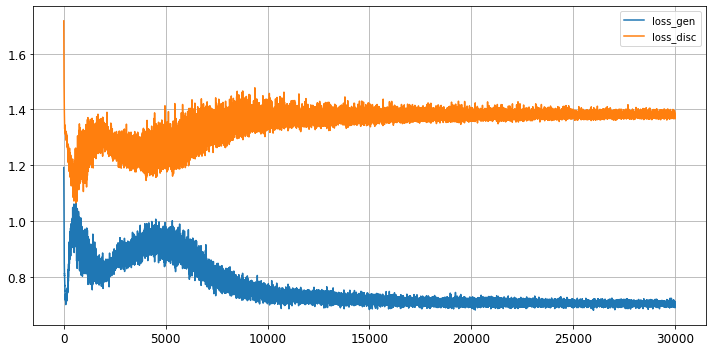

Predicted Values: (1000, 3)
save latent space


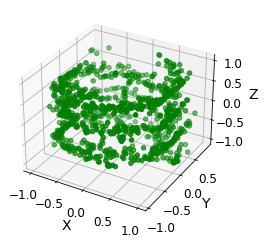

save countour line


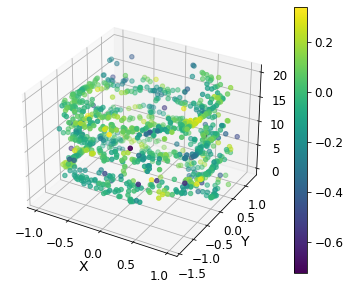

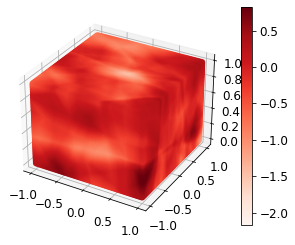

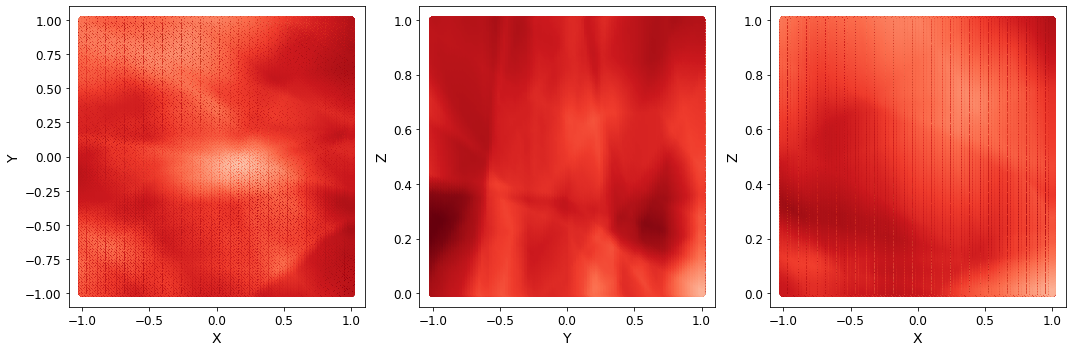

In [8]:
hist = dcgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

#### plot loss

In [9]:
k=k
epoch = epochs

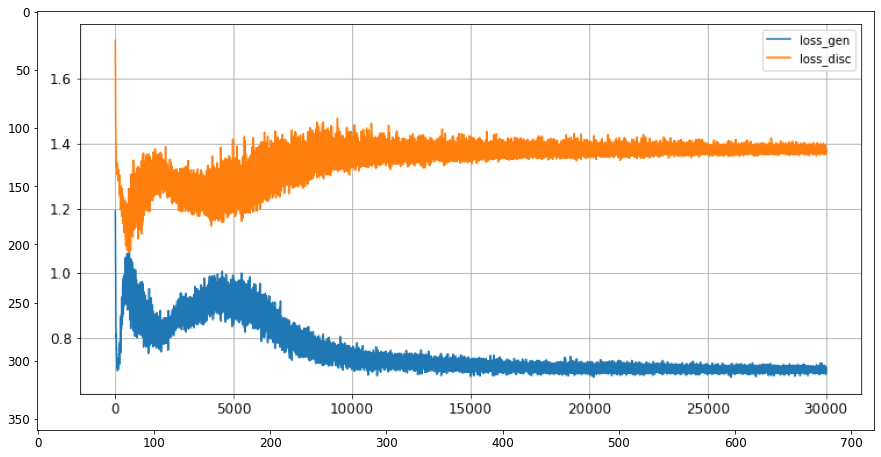

In [10]:
from PIL import Image

#Discriminator Loss
loss = Image.open('GANS/Losses/GANS_loss_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Loss",figsize=[15,10])
plt.imshow(loss)

### Sampleing from the latent space

In [11]:
generator = keras.models.load_model('GANS/Models/generator_v'+str(k)+'_epochs_'+str(epoch))

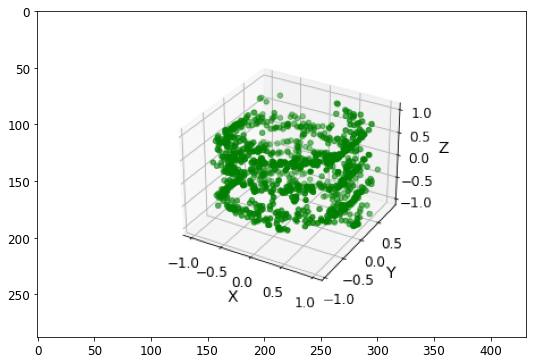

In [12]:
result = Image.open('GANS/Result/Latent/v_'+str(k)+'_epochs_'+str(epoch)+'.png')
plt.figure("Latent Space",figsize=[10,6])
plt.imshow(result)

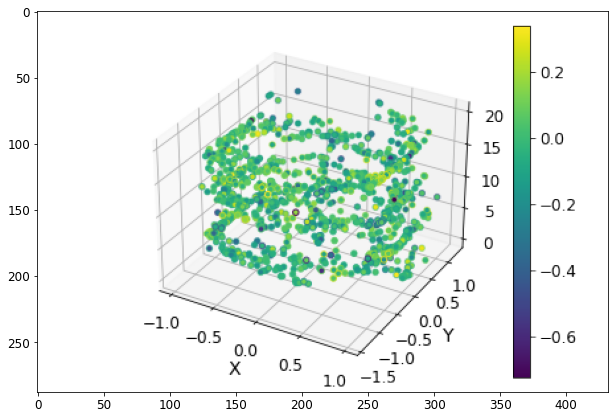

In [13]:
countour_line = Image.open('GANS/Result/'+'countour_points_v'+str(k)+'_epochs'+str(epoch)+'.png')
plt.figure("Countour Line",figsize=[18,7])
plt.imshow(countour_line)

#1=real, 0=fake

### Applying the prediction function

## Fixed Input